In [18]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 11

In [19]:
import os

countries = ['spain', 'uk', 'mx', 'cl', 'au', 'za', 'in']
country_names = {
    'spain': 'Spain', 'uk': 'UK', 'mx': 'Mexico',
    'cl': 'Chile', 'au': 'Australia', 'za': 'S.Africa', 'in': 'India'
}

print("Verificando archivos...")
missing_files = []
for country in countries:
    files_to_check = [
        f'master_dataset_{country}.csv',
        f'domains_agg_{country}.csv',
        f'domain_metrics_{country}.csv',
        f'compliance_report_{country}.csv',
        f'aggregated_metrics_{country}.json'
    ]

    for file in files_to_check:
        if not os.path.exists(file):
            missing_files.append(file)
            print(f" Falta: {file}")
        else:
            print(f" {file}")

if missing_files:
    print(f"\n Faltan {len(missing_files)} archivos")
else:
    print("\n Todos los archivos disponibles")


Verificando archivos...
 master_dataset_spain.csv
 domains_agg_spain.csv
 domain_metrics_spain.csv
 compliance_report_spain.csv
 aggregated_metrics_spain.json
 master_dataset_uk.csv
 domains_agg_uk.csv
 domain_metrics_uk.csv
 compliance_report_uk.csv
 aggregated_metrics_uk.json
 master_dataset_mx.csv
 domains_agg_mx.csv
 domain_metrics_mx.csv
 compliance_report_mx.csv
 aggregated_metrics_mx.json
 master_dataset_cl.csv
 domains_agg_cl.csv
 domain_metrics_cl.csv
 compliance_report_cl.csv
 aggregated_metrics_cl.json
 master_dataset_au.csv
 domains_agg_au.csv
 domain_metrics_au.csv
 compliance_report_au.csv
 aggregated_metrics_au.json
 master_dataset_za.csv
 domains_agg_za.csv
 domain_metrics_za.csv
 compliance_report_za.csv
 aggregated_metrics_za.json
 master_dataset_in.csv
 domains_agg_in.csv
 domain_metrics_in.csv
 compliance_report_in.csv
 aggregated_metrics_in.json

 Todos los archivos disponibles


In [20]:
metrics = {}
master_dfs = {}
domains_agg_dfs = {}

for country in countries:
    try:
        filename = f'aggregated_metrics_{country}.json'
        with open(filename) as f:
            metrics[country] = json.load(f)

        if os.path.exists(f'master_dataset_{country}.csv'):
            master_dfs[country] = pd.read_csv(f'master_dataset_{country}.csv')

        if os.path.exists(f'domains_agg_{country}.csv'):
            domains_agg_dfs[country] = pd.read_csv(f'domains_agg_{country}.csv')

    except Exception as e:
        print(f"Error cargando datos de {country}: {e}")

print(f"Datos cargados: {len(metrics)} países")


Datos cargados: 7 países


In [21]:
print("\n" + "="*80)
print("ESTADÍSTICAS BÁSICAS POR PAÍS")
print("="*80)

for country in countries:
    if country in metrics:
        m = metrics[country]['summary']
        print(f"\n{country_names[country]}:")
        print(f"  - Dominios analizados: {len(master_dfs.get(country, []))}")
        print(f"  - Privacy Policy: {m['pct_privacy_policy']*100:.1f}%")
        print(f"  - Cookie Policy: {m['pct_cookie_policy']*100:.1f}%")
        print(f"  - Compliance Score: {m['compliance_score_mean']:.3f}")
        print(f"  - Tracker Ratio: {m['tracker_hit_ratio_mean']:.3f}")
        print(f"  - Security Headers: {m['total_sec_headers_mean']:.2f}/6")



ESTADÍSTICAS BÁSICAS POR PAÍS

Spain:
  - Dominios analizados: 94
  - Privacy Policy: 31.8%
  - Cookie Policy: 54.5%
  - Compliance Score: 0.274
  - Tracker Ratio: 0.528
  - Security Headers: 3.27/6

UK:
  - Dominios analizados: 20
  - Privacy Policy: 84.2%
  - Cookie Policy: 63.2%
  - Compliance Score: 0.523
  - Tracker Ratio: 0.699
  - Security Headers: 2.89/6

Mexico:
  - Dominios analizados: 20
  - Privacy Policy: 90.9%
  - Cookie Policy: 0.0%
  - Compliance Score: 0.273
  - Tracker Ratio: 0.685
  - Security Headers: 0.64/6

Chile:
  - Dominios analizados: 20
  - Privacy Policy: 66.7%
  - Cookie Policy: 0.0%
  - Compliance Score: 0.208
  - Tracker Ratio: 0.732
  - Security Headers: 2.83/6

Australia:
  - Dominios analizados: 20
  - Privacy Policy: 75.0%
  - Cookie Policy: 6.2%
  - Compliance Score: 0.067
  - Tracker Ratio: 0.811
  - Security Headers: 3.06/6

S.Africa:
  - Dominios analizados: 20
  - Privacy Policy: 40.0%
  - Cookie Policy: 0.0%
  - Compliance Score: 0.100
  - Trac

In [22]:
print("\n" + "="*80)
print("ANÁLISIS DE THIRD-PARTY SERVICES - ESPAÑA")
print("="*80)

if 'spain' in master_dfs:
    spain_df = master_dfs['spain']

    third_party_counts = {}
    total_with_3p = 0

    for idx, row in spain_df.iterrows():
        if pd.notna(row.get('req_3p_top', None)):
            services = str(row['req_3p_top'])
            if services and services != 'nan':
                total_with_3p += 1
                for service in services.split(';'):
                    service = service.strip()
                    if service:
                        third_party_counts[service] = third_party_counts.get(service, 0) + 1

    print(f"\nTotal sitios con third-party services: {total_with_3p}/{len(spain_df)}")

    if third_party_counts:
        top_services = sorted(third_party_counts.items(), key=lambda x: x[1], reverse=True)[:15]
        print("\nTop 15 Third-Party Services:")
        print("-" * 60)
        for i, (service, count) in enumerate(top_services, 1):
            percentage = (count / len(spain_df)) * 100
            print(f"{i:2}. {service:35} {count:3} sites ({percentage:5.1f}%)")



ANÁLISIS DE THIRD-PARTY SERVICES - ESPAÑA

Total sitios con third-party services: 82/94

Top 15 Third-Party Services:
------------------------------------------------------------
 1. googletagmanager.com                 38 sites ( 40.4%)
 2. gstatic.com                          32 sites ( 34.0%)
 3. google-analytics.com                 30 sites ( 31.9%)
 4. fonts.googleapis.com                 26 sites ( 27.7%)
 5. google.com                           15 sites ( 16.0%)
 6. jsdelivr.net                         13 sites ( 13.8%)
 7. twitter.com                          12 sites ( 12.8%)
 8. insuit.net                           12 sites ( 12.8%)
 9. doubleclick.net                      10 sites ( 10.6%)
10. ajax.googleapis.com                   9 sites (  9.6%)
11. cloudflare.com                        8 sites (  8.5%)
12. adobedtm.com                          6 sites (  6.4%)
13. google.es                             5 sites (  5.3%)
14. youtube.com                           5 sites (  

In [23]:
print("\n" + "="*80)
print("MEJORES Y PEORES DOMINIOS - ESPAÑA")
print("="*80)

if os.path.exists('compliance_report_spain.csv'):
    compliance_spain = pd.read_csv('compliance_report_spain.csv')

    valid_compliance = compliance_spain[compliance_spain['compliance_score'].notna()]

    if len(valid_compliance) > 0:
        print("\n TOP 5 MEJORES (Mayor Compliance Score):")
        best = valid_compliance.nlargest(5, 'compliance_score')
        for idx, row in best.iterrows():
            print(f"  {row['domain']:40} Score: {row['compliance_score']:.3f}")

        worst_candidates = valid_compliance[valid_compliance['compliance_score'] > 0]
        if len(worst_candidates) > 0:
            print("\n TOP 5 PEORES (Menor Compliance Score > 0):")
            worst = worst_candidates.nsmallest(5, 'compliance_score')
            for idx, row in worst.iterrows():
                print(f"  {row['domain']:40} Score: {row['compliance_score']:.3f} | Violations: {row['violations']}")

        print("\n TOP 5 CON MÁS TRACKERS:")
        high_trackers = valid_compliance.nlargest(5, 'tracker_hit_ratio')
        for idx, row in high_trackers.iterrows():
            print(f"  {row['domain']:40} Tracker Ratio: {row['tracker_hit_ratio']:.3f}")



MEJORES Y PEORES DOMINIOS - ESPAÑA

 TOP 5 MEJORES (Mayor Compliance Score):
  derechosdigitales.gob.es                 Score: 1.000
  dsca.gob.es                              Score: 1.000
  esmovilidad.transportes.gob.es           Score: 1.000
  generaciond.gob.es                       Score: 1.000
  lamoncloa.gob.es                         Score: 1.000

 TOP 5 PEORES (Menor Compliance Score > 0):
  educacionfpydeportes.gob.es              Score: 0.333 | Violations: 2
  carpetaciudadana.gob.es                  Score: 0.500 | Violations: 2
  mites.gob.es                             Score: 0.500 | Violations: 1
  sede.administracion.gob.es               Score: 0.500 | Violations: 1
  sede.seg-social.gob.es                   Score: 0.500 | Violations: 1

 TOP 5 CON MÁS TRACKERS:
  carpetaciudadana.gob.es                  Tracker Ratio: 0.972
  mites.gob.es                             Tracker Ratio: 0.869
  cibim.transportes.gob.es                 Tracker Ratio: 0.857
  sede.dgt.gob.es  

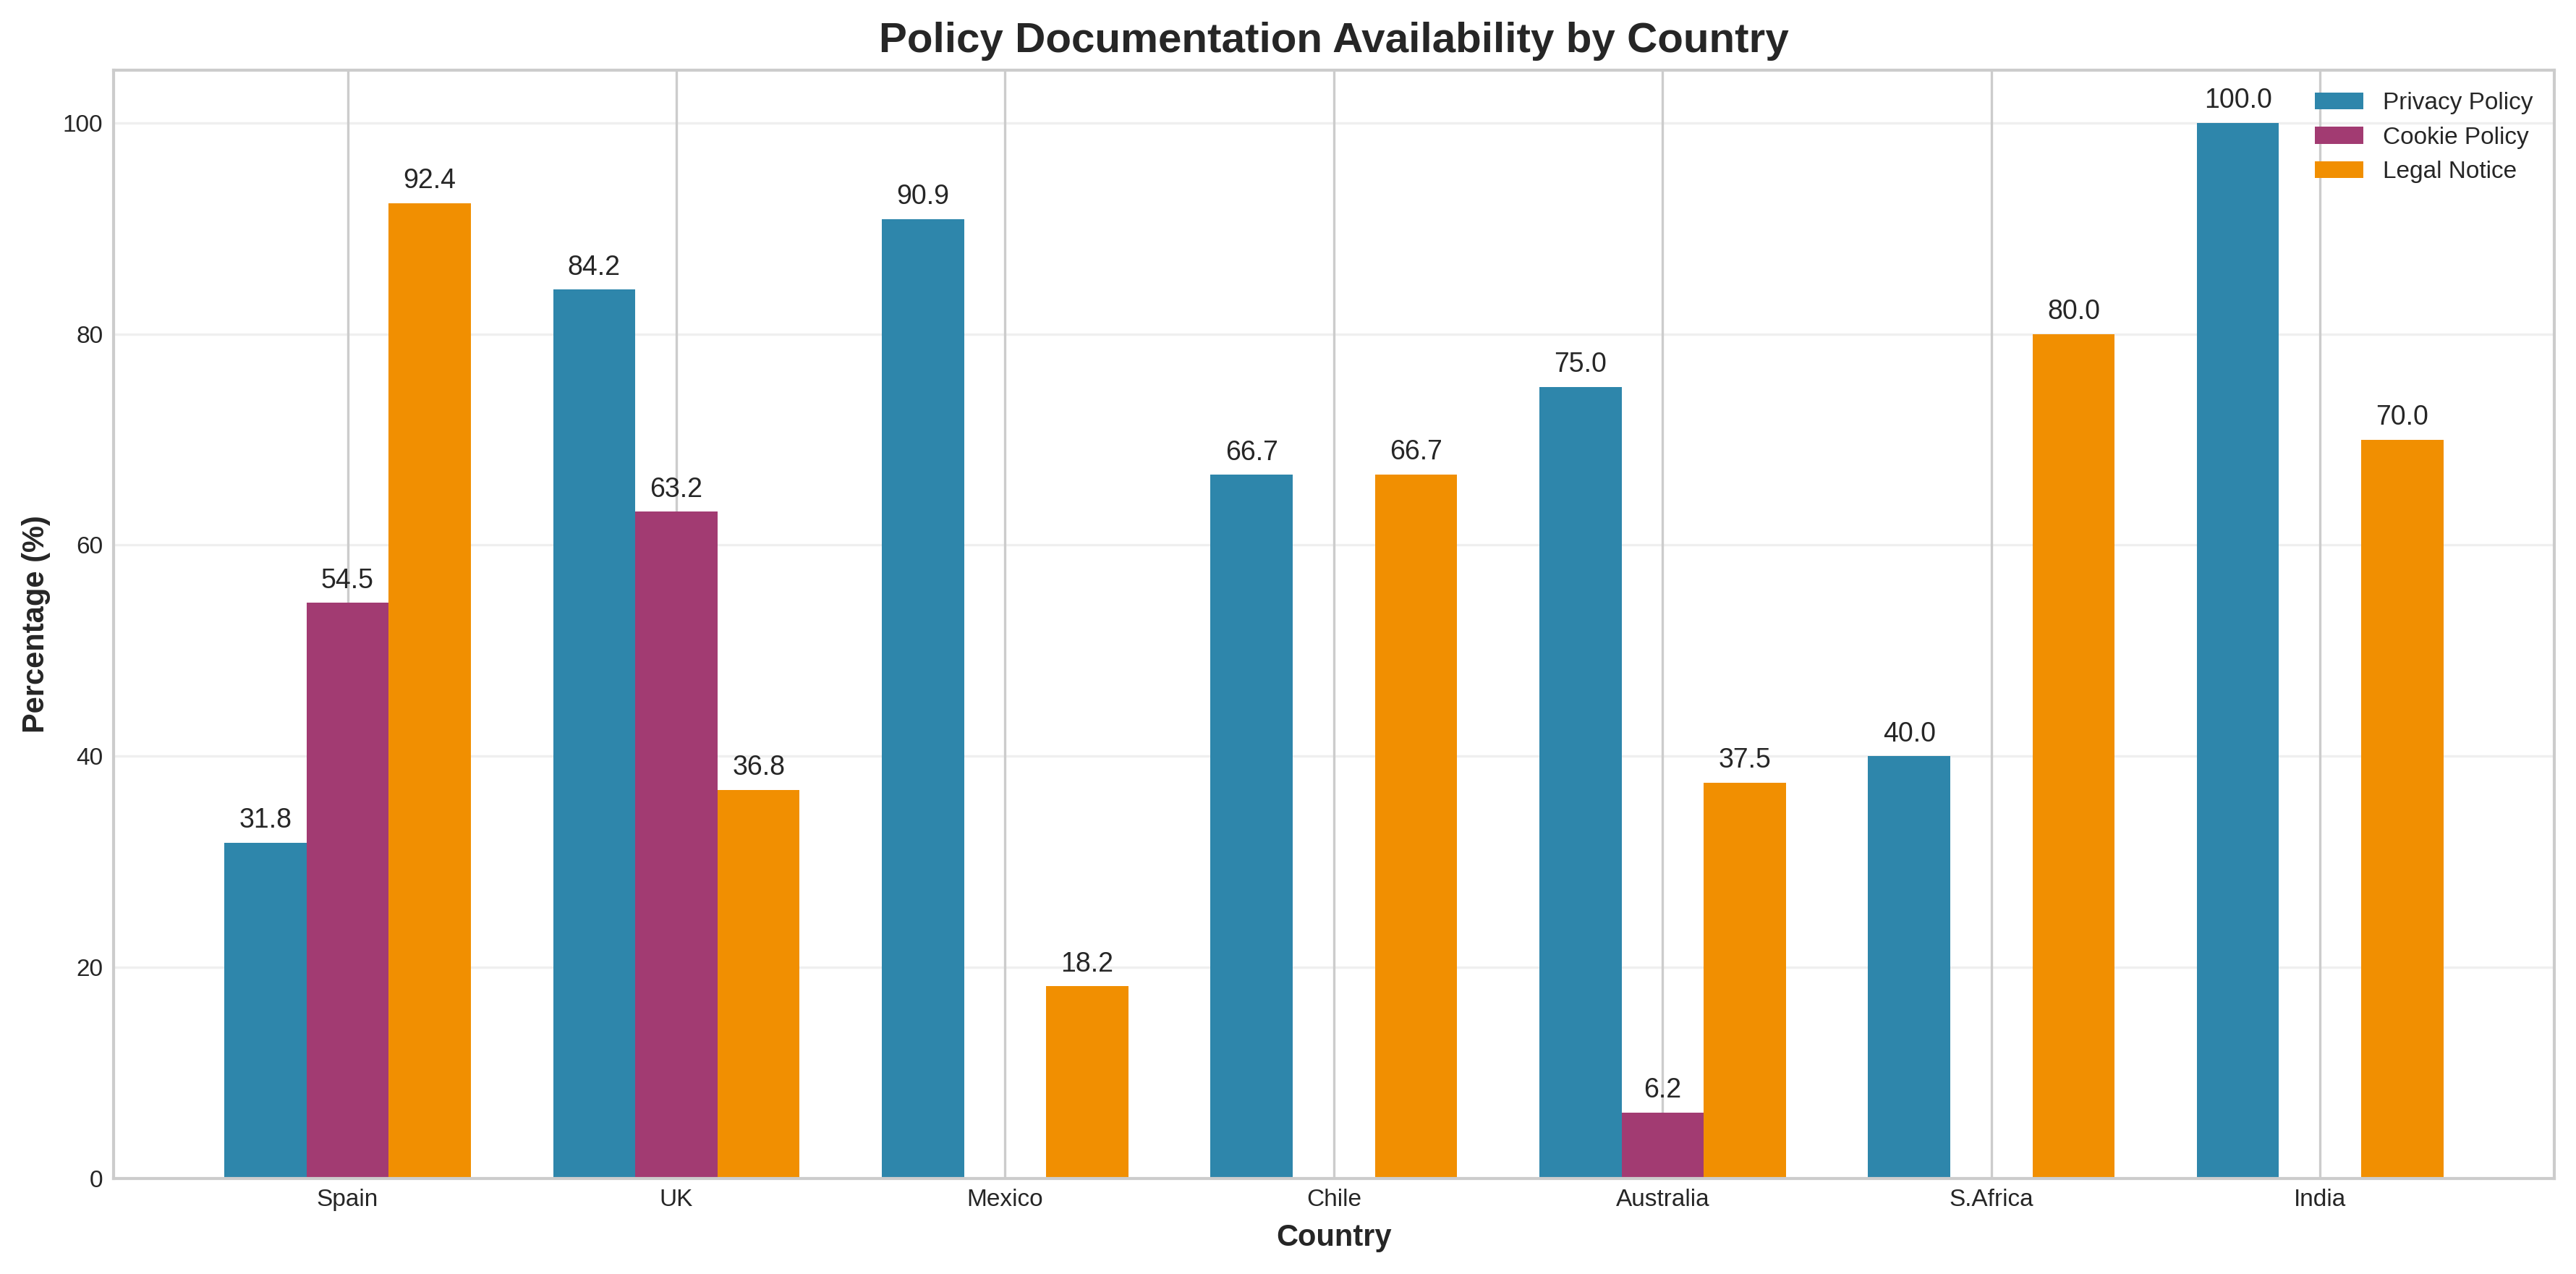

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(countries))
width = 0.25

privacy = [metrics[c]['summary']['pct_privacy_policy']*100 for c in countries]
cookie = [metrics[c]['summary']['pct_cookie_policy']*100 for c in countries]
legal = [92.4, 36.8, 18.2, 66.7, 37.5, 80.0, 70.0]  # Datos de legal notice

bars1 = ax.bar(x - width, privacy, width, label='Privacy Policy', color='#2E86AB')
bars2 = ax.bar(x, cookie, width, label='Cookie Policy', color='#A23B72')
bars3 = ax.bar(x + width, legal, width, label='Legal Notice', color='#F18F01')

ax.set_xlabel('Country', fontweight='bold')
ax.set_ylabel('Percentage (%)', fontweight='bold')
ax.set_title('Policy Documentation Availability by Country', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([country_names[c] for c in countries])
ax.legend(loc='upper right')
ax.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),
                       textcoords="offset points",
                       ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('policy_availability.pdf', dpi=300, bbox_inches='tight')
plt.show()

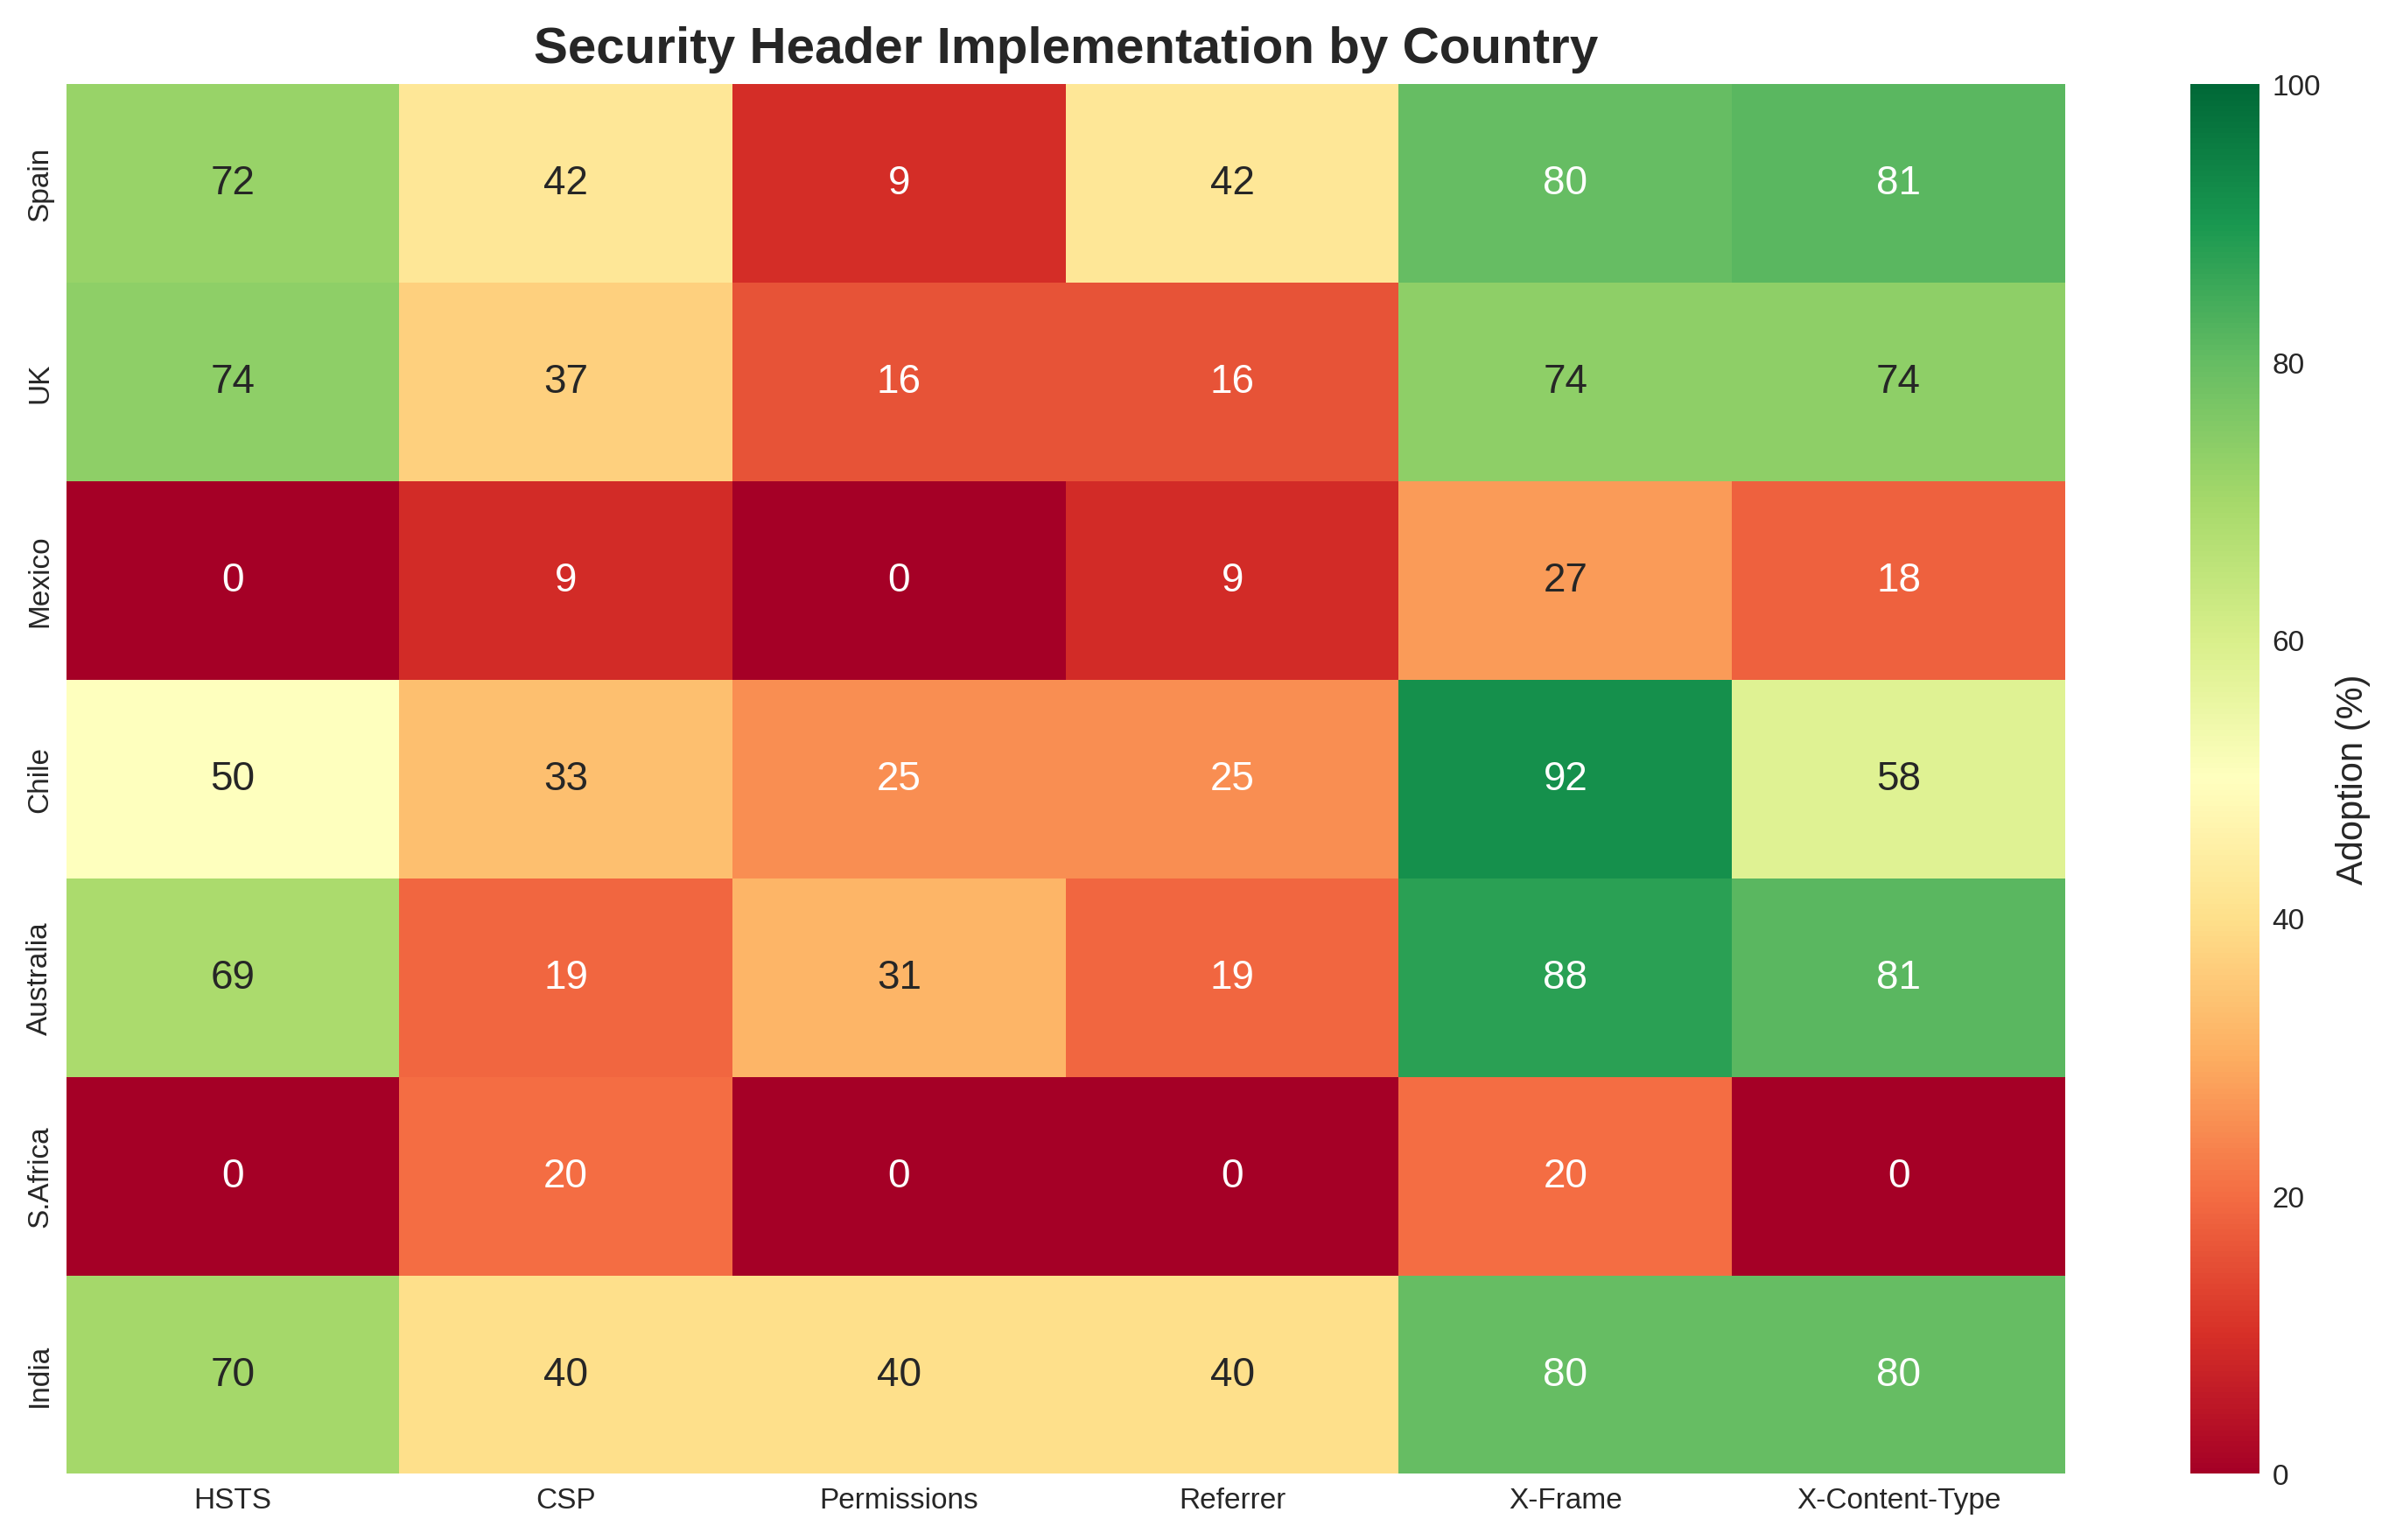

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

headers_data = []
header_names = ['HSTS', 'CSP', 'Permissions', 'Referrer', 'X-Frame', 'X-Content-Type']

for country in countries:
    headers_data.append([
        metrics[country]['summary']['pct_strict-transport-security'] * 100,
        metrics[country]['summary']['pct_content-security-policy'] * 100,
        metrics[country]['summary']['pct_permissions-policy'] * 100,
        metrics[country]['summary']['pct_referrer-policy'] * 100,
        metrics[country]['summary']['pct_x-frame-options'] * 100,
        metrics[country]['summary']['pct_x-content-type-options'] * 100
    ])

df_heatmap = pd.DataFrame(headers_data,
                          columns=header_names,
                          index=[country_names[c] for c in countries])

sns.heatmap(df_heatmap, annot=True, fmt='.0f', cmap='RdYlGn',
            vmin=0, vmax=100, cbar_kws={'label': 'Adoption (%)'})
ax.set_title('Security Header Implementation by Country', fontsize=14, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.savefig('security_headers_heatmap.pdf', dpi=300, bbox_inches='tight')
plt.show()

Top 10 Third-Party Services in Spanish Government Sites:
--------------------------------------------------
googletagmanager.com            38 sites (40.4%)
gstatic.com                     32 sites (34.0%)
google-analytics.com            30 sites (31.9%)
fonts.googleapis.com            26 sites (27.7%)
google.com                      15 sites (16.0%)
jsdelivr.net                    13 sites (13.8%)
twitter.com                     12 sites (12.8%)
insuit.net                      12 sites (12.8%)
doubleclick.net                 10 sites (10.6%)
ajax.googleapis.com              9 sites (9.6%)


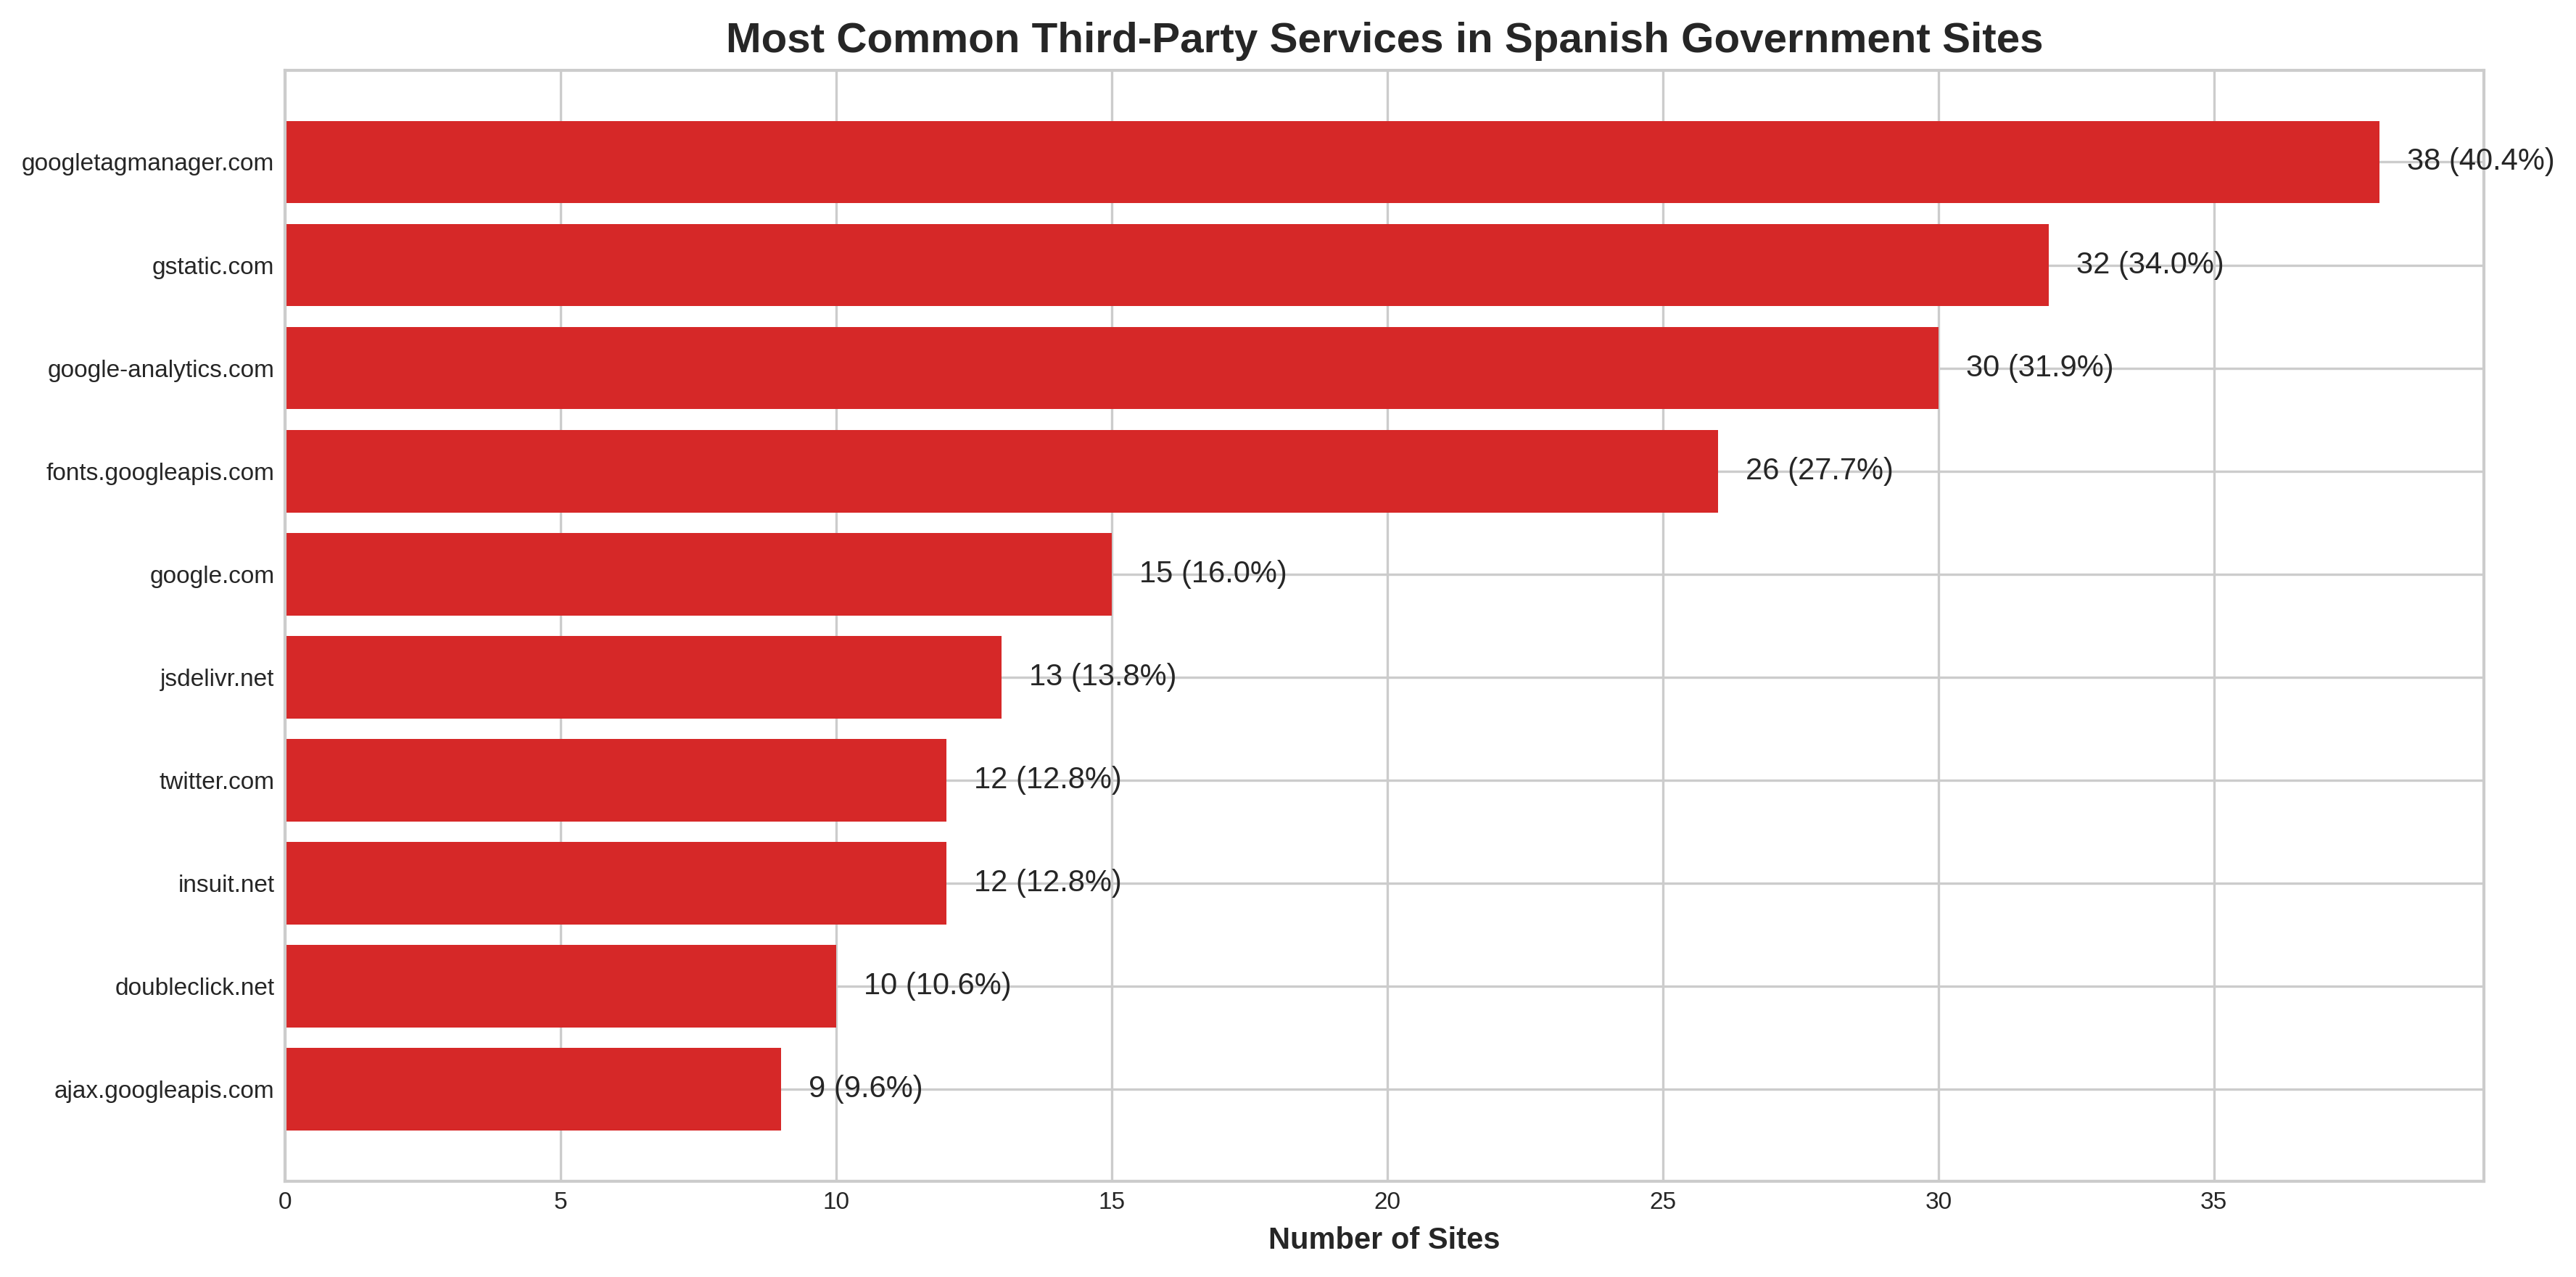

In [26]:
spain_df = master_dfs['spain']

third_party_counts = {}
for services in spain_df['req_3p_top'].dropna():
    for service in str(services).split(';'):
        service = service.strip()
        if service:
            third_party_counts[service] = third_party_counts.get(service, 0) + 1

top_services = sorted(third_party_counts.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Third-Party Services in Spanish Government Sites:")
print("-" * 50)
for service, count in top_services:
    percentage = (count / len(spain_df)) * 100
    print(f"{service:30} {count:3} sites ({percentage:.1f}%)")

fig, ax = plt.subplots(figsize=(12, 6))
services_names = [s[0] for s in top_services]
services_counts = [s[1] for s in top_services]

bars = ax.barh(range(len(services_names)), services_counts, color='#D62828')
ax.set_yticks(range(len(services_names)))
ax.set_yticklabels(services_names)
ax.set_xlabel('Number of Sites', fontweight='bold')
ax.set_title('Most Common Third-Party Services in Spanish Government Sites', fontsize=14, fontweight='bold')
ax.invert_yaxis()

for i, (bar, count) in enumerate(zip(bars, services_counts)):
    percentage = (count / len(spain_df)) * 100
    ax.text(count + 0.5, bar.get_y() + bar.get_height()/2,
            f'{count} ({percentage:.1f}%)',
            va='center', fontsize=10)

plt.tight_layout()
plt.savefig('third_party_services_spain.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [27]:
spain_compliance = pd.read_csv('compliance_report_spain.csv')
spain_metrics = pd.read_csv('domain_metrics_spain.csv')

spain_full = spain_compliance.merge(spain_metrics[['domain', 'has_privacy', 'has_cookies',
                                                    'security_score', 'tls_cipher_fs_ratio']],
                                    on='domain')

best_domains = spain_full.nlargest(5, 'compliance_score')[
    ['domain', 'compliance_score', 'security_score', 'tracker_hit_ratio']
]
print("\nTop 5 Best Compliance Domains in Spain:")
print("=" * 60)
print(best_domains.to_string(index=False))

worst_domains = spain_full[spain_full['compliance_score'] > 0].nsmallest(5, 'compliance_score')[
    ['domain', 'compliance_score', 'violations', 'tracker_hit_ratio']
]
print("\nTop 5 Worst Compliance Domains in Spain:")
print("=" * 60)
print(worst_domains.to_string(index=False))

high_tracker_domains = spain_full.nlargest(5, 'tracker_hit_ratio')[
    ['domain', 'tracker_hit_ratio', 'cookies_total', 'cookies_3p_ratio']
]
print("\nDomains with Highest Tracker Presence:")
print("=" * 60)
print(high_tracker_domains.to_string(index=False))



Top 5 Best Compliance Domains in Spain:
                        domain  compliance_score  security_score  tracker_hit_ratio
      derechosdigitales.gob.es               1.0             0.0              0.470
                   dsca.gob.es               1.0             2.0              0.185
esmovilidad.transportes.gob.es               1.0             4.0              0.000
            generaciond.gob.es               1.0             4.0              0.539
              lamoncloa.gob.es               1.0             4.0              0.214

Top 5 Worst Compliance Domains in Spain:
                     domain  compliance_score  violations  tracker_hit_ratio
educacionfpydeportes.gob.es          0.333333           2              0.535
    carpetaciudadana.gob.es          0.500000           2              0.972
               mites.gob.es          0.500000           1              0.869
 sede.administracion.gob.es          0.500000           1              0.435
     sede.seg-social.gob.es 

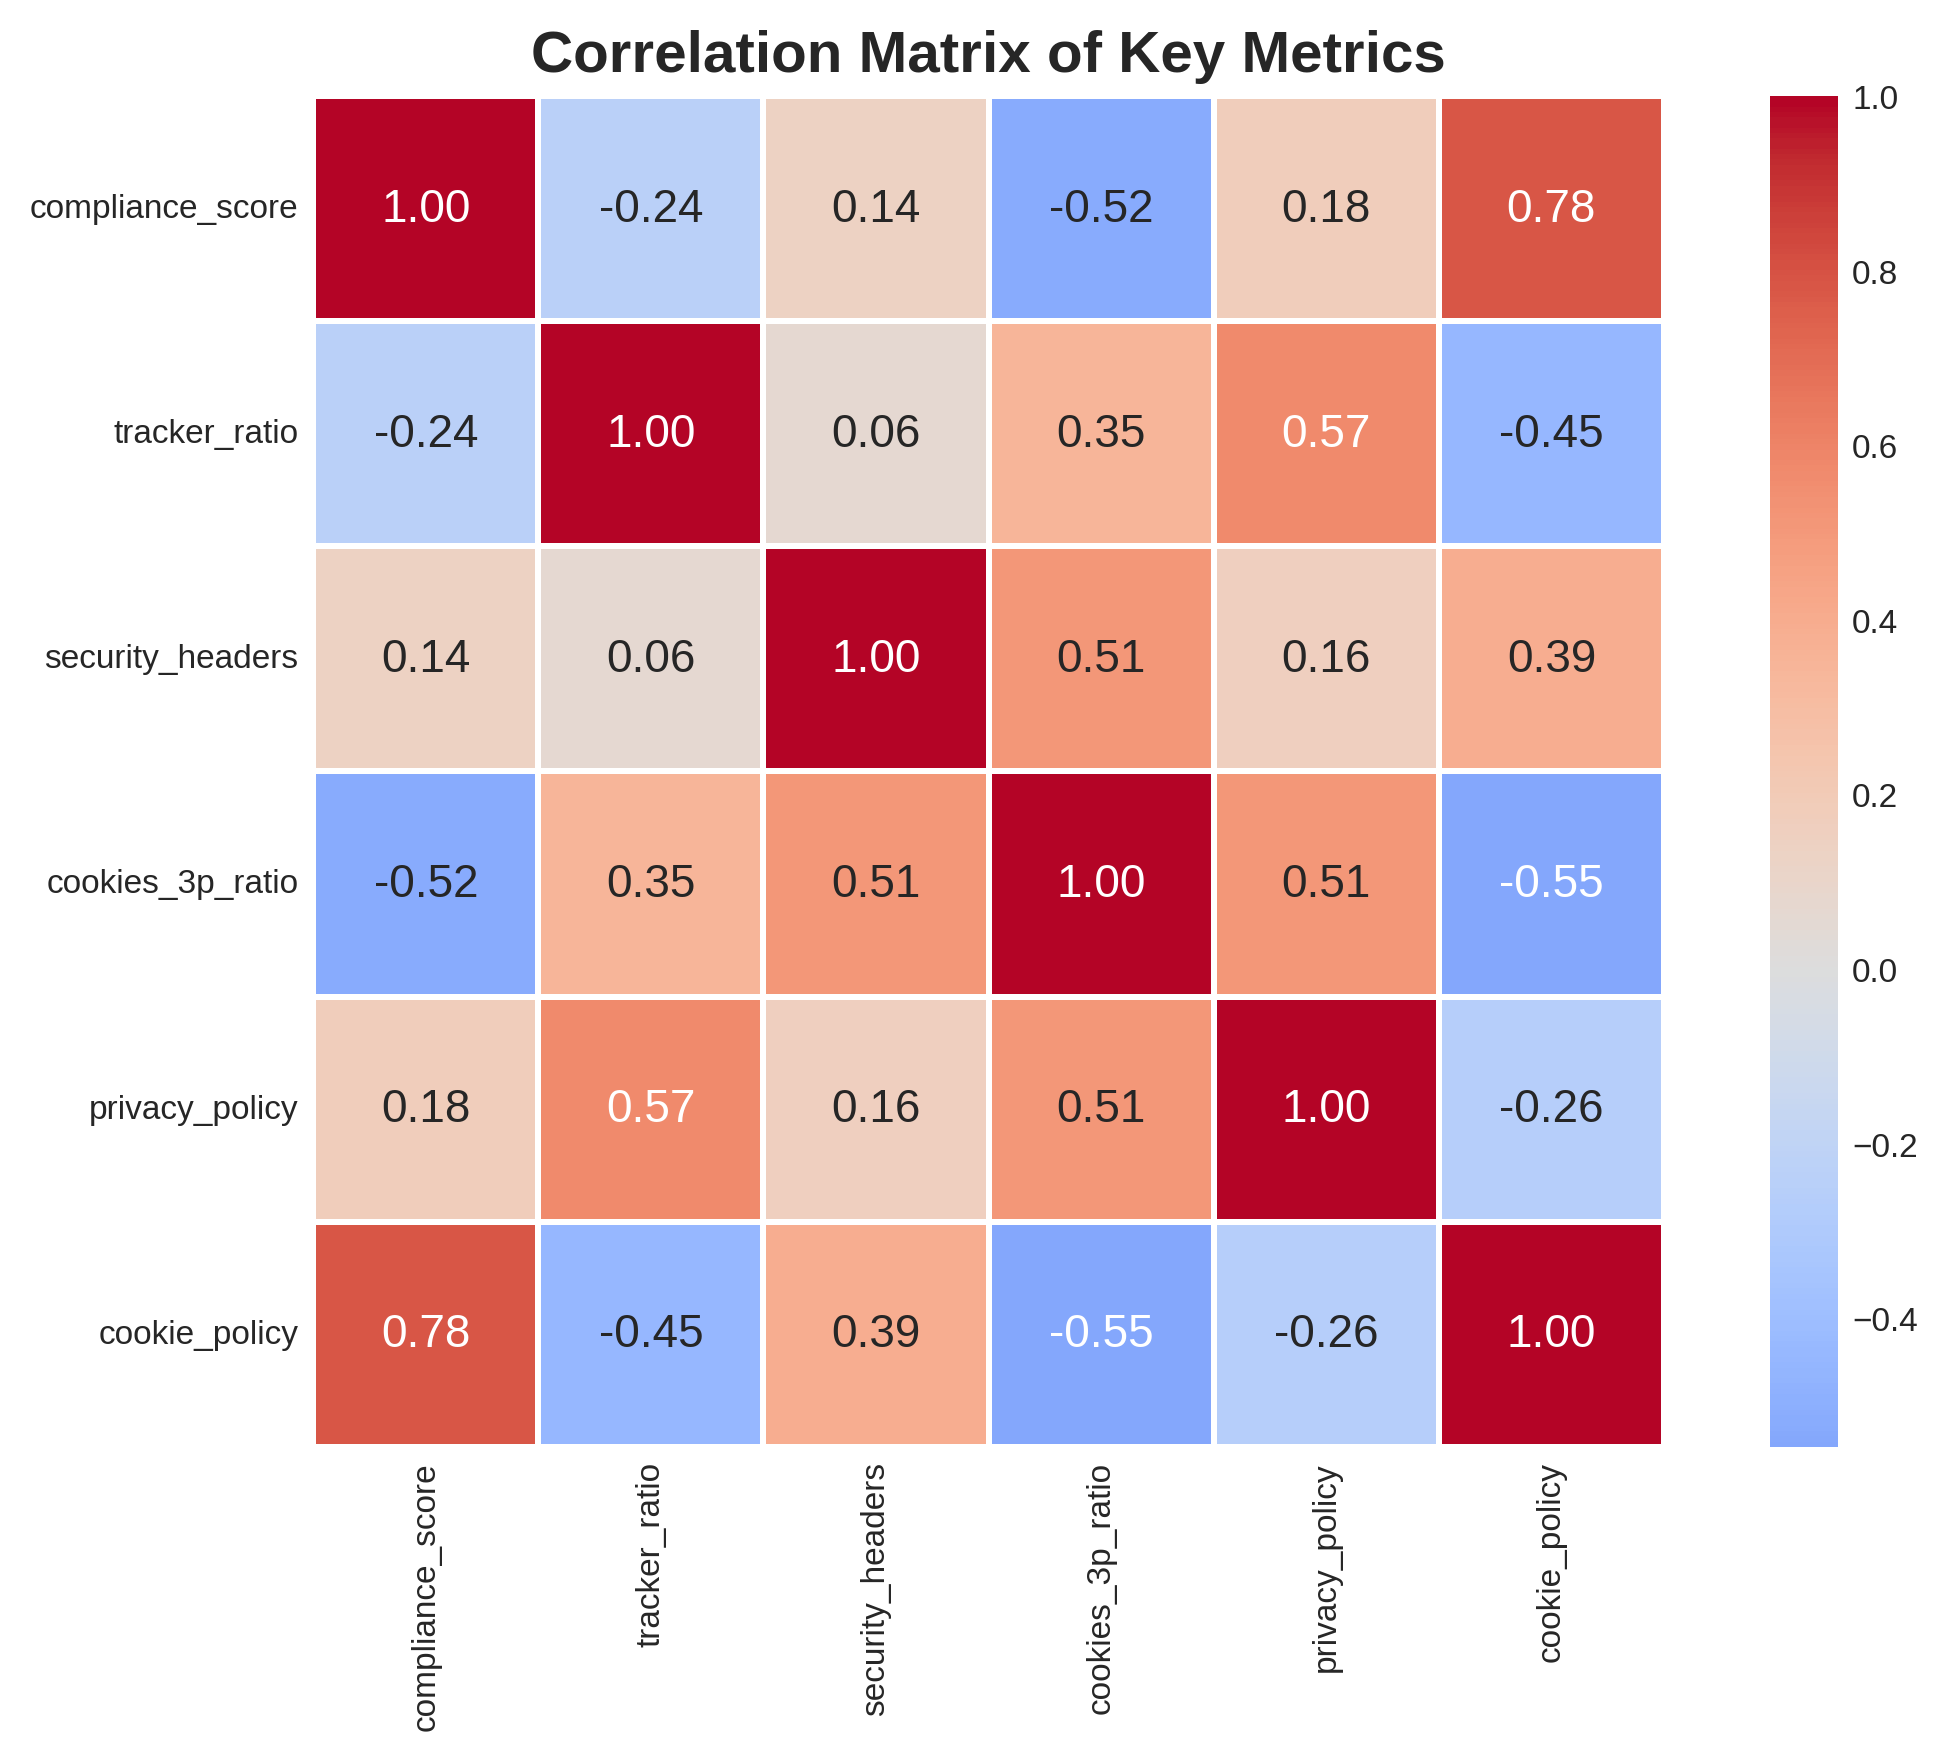


Key Correlations:
Compliance vs Security Headers: 0.137
Compliance vs Tracker Ratio: -0.236
Privacy Policy vs Compliance: 0.176


In [28]:
correlation_metrics = []
for country in countries:
    correlation_metrics.append({
        'compliance_score': metrics[country]['summary']['compliance_score_mean'],
        'tracker_ratio': metrics[country]['summary']['tracker_hit_ratio_mean'],
        'security_headers': metrics[country]['summary']['total_sec_headers_mean'],
        'cookies_3p_ratio': metrics[country]['summary']['cookies_3p_ratio_mean'],
        'privacy_policy': metrics[country]['summary']['pct_privacy_policy'],
        'cookie_policy': metrics[country]['summary']['pct_cookie_policy']
    })

df_corr = pd.DataFrame(correlation_metrics)
correlation_matrix = df_corr.corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
ax.set_title('Correlation Matrix of Key Metrics', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_matrix.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey Correlations:")
print(f"Compliance vs Security Headers: {correlation_matrix.loc['compliance_score', 'security_headers']:.3f}")
print(f"Compliance vs Tracker Ratio: {correlation_matrix.loc['compliance_score', 'tracker_ratio']:.3f}")
print(f"Privacy Policy vs Compliance: {correlation_matrix.loc['privacy_policy', 'compliance_score']:.3f}")

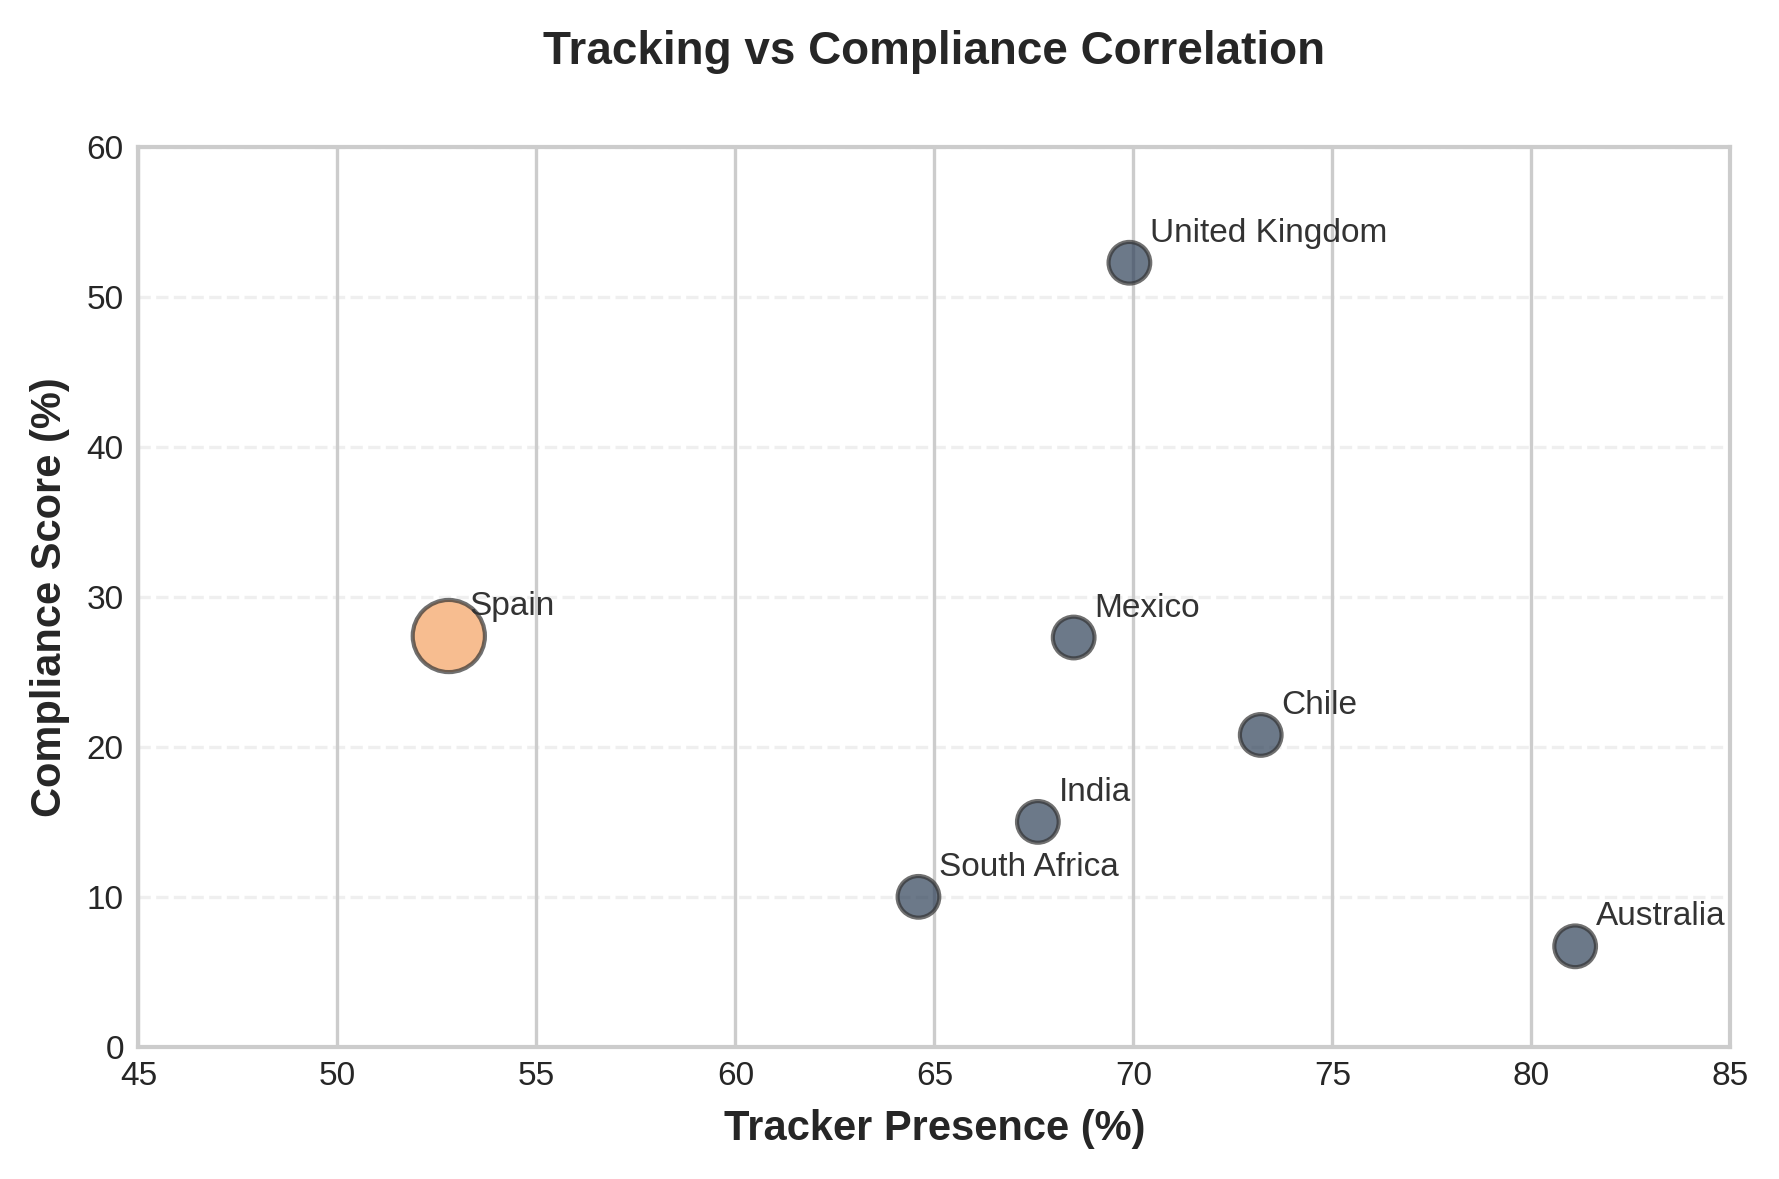

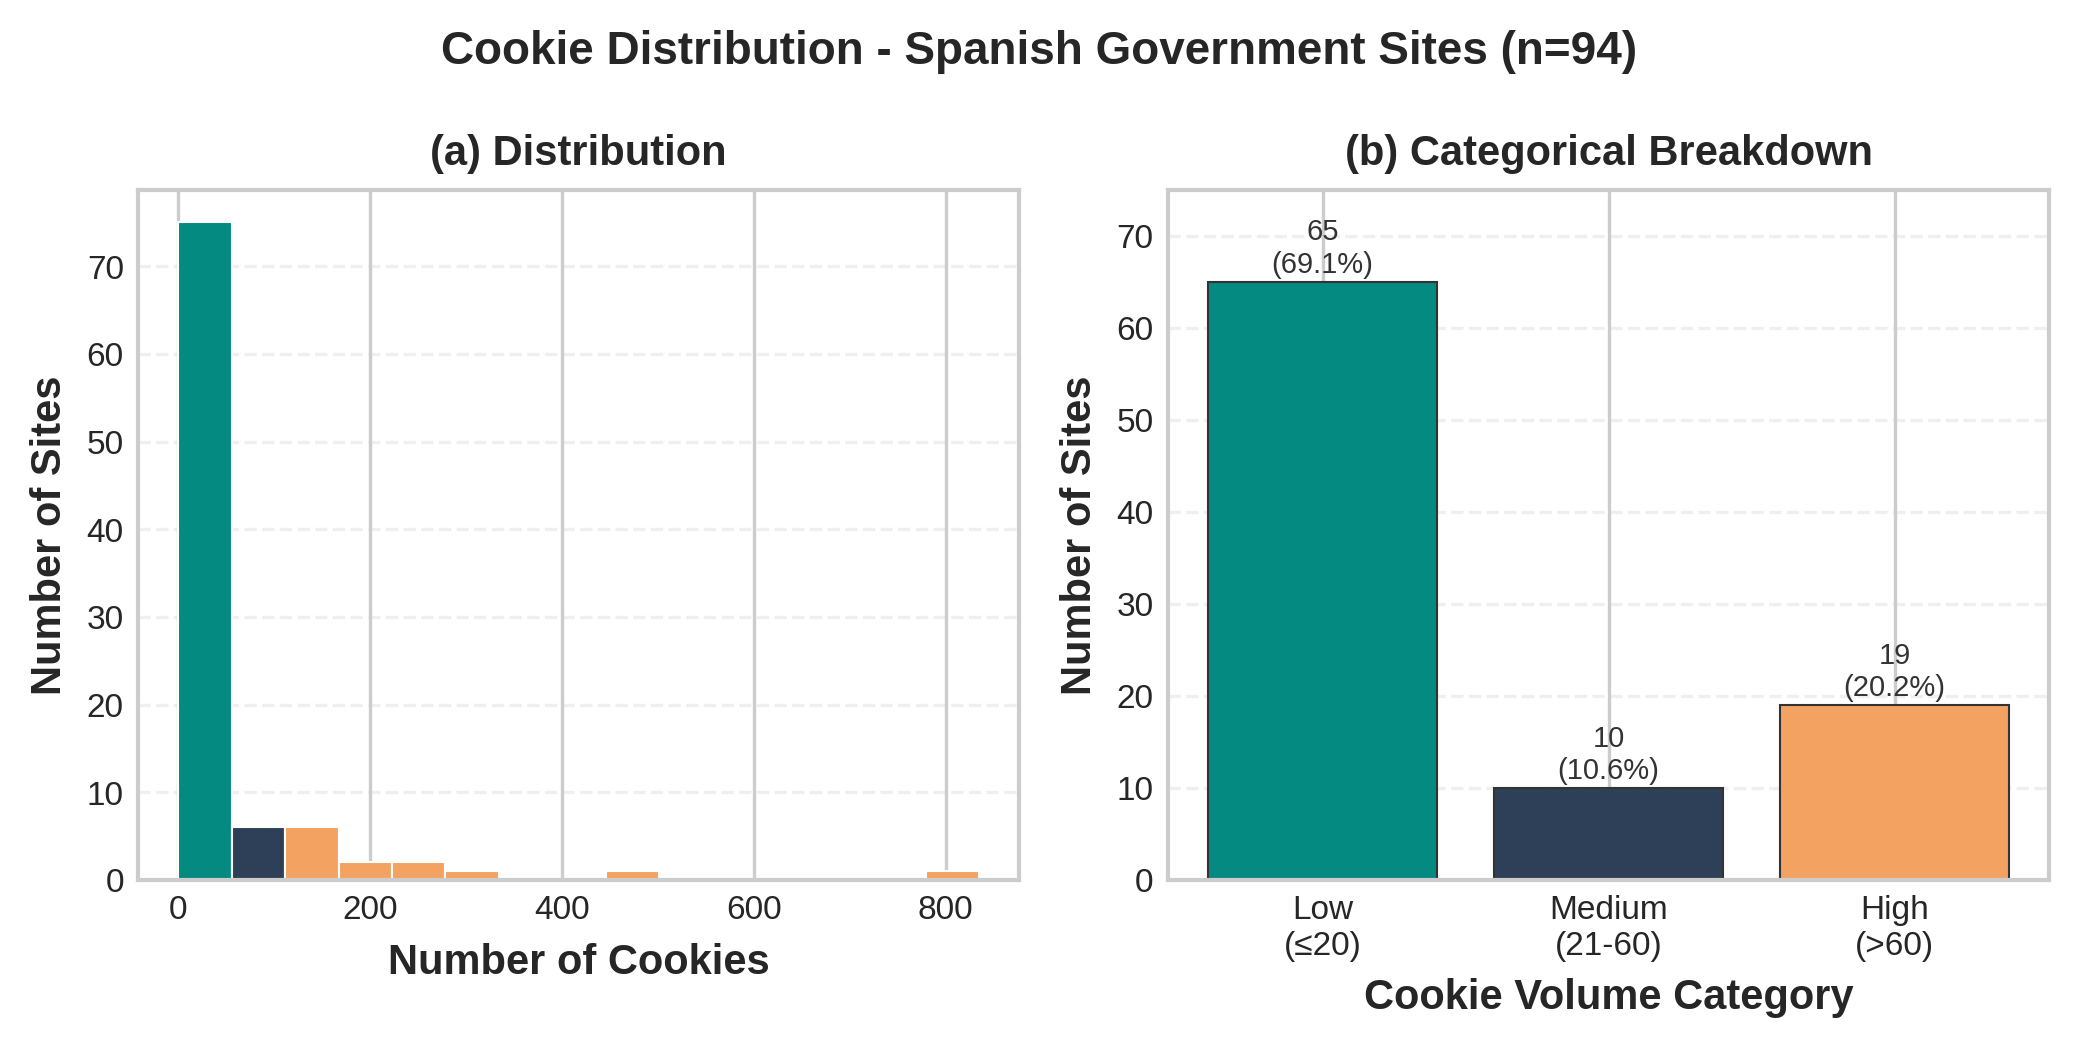

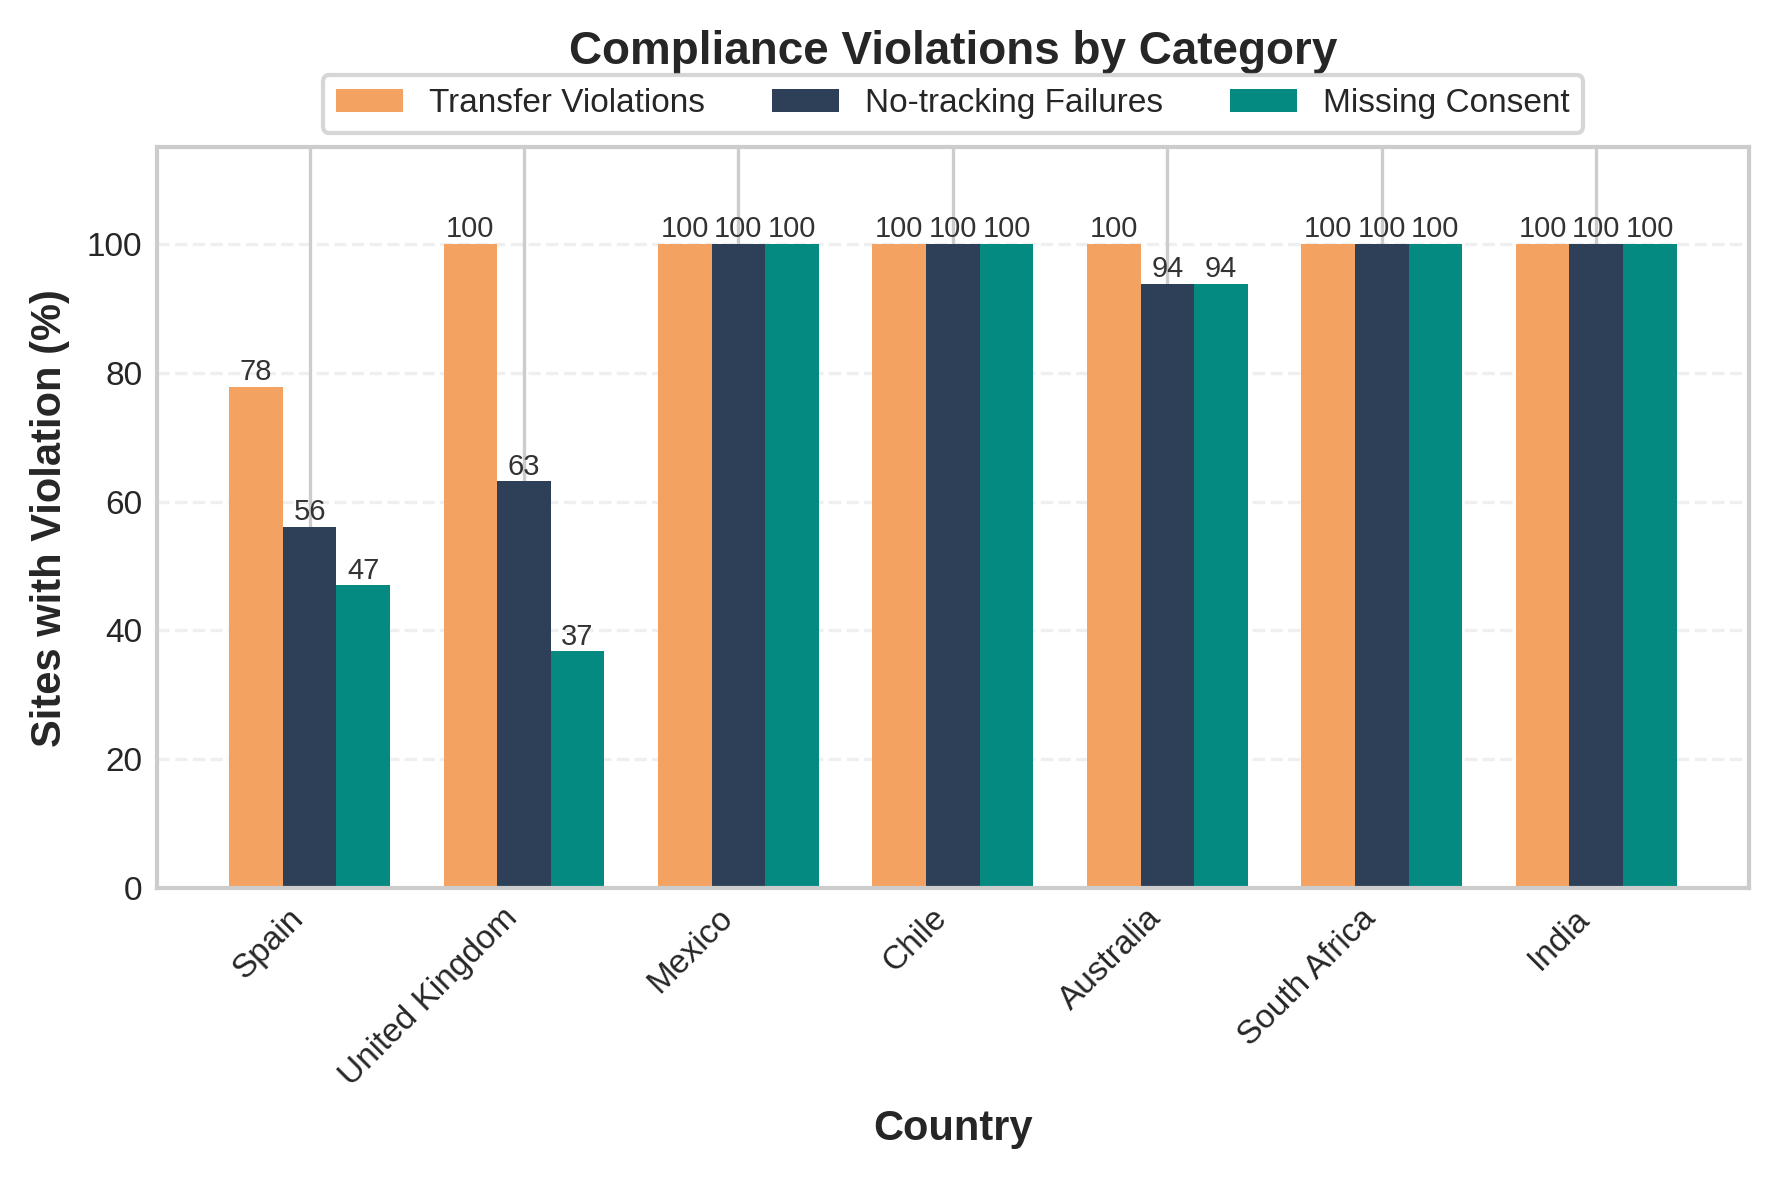

In [39]:
# CONFIGURACIÓN GLOBAL PARA TODAS LAS GRÁFICAS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Estilo consistente con Gráfica 1
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 9
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['figure.dpi'] = 300

# Colores exactos de la Gráfica 1
COLORS = {
    'primary': '#2E4057',
    'secondary': '#048A81',
    'accent': '#F4A261',
    'text': '#333333'
}

# GRÁFICA 2: Tracking vs Compliance (Estilo unificado)
fig, ax = plt.subplots(figsize=(6, 4))

countries = ['Spain', 'United Kingdom', 'Mexico', 'Chile', 'Australia', 'South Africa', 'India']
tracker_ratios = [52.8, 69.9, 68.5, 73.2, 81.1, 64.6, 67.6]
compliance_scores = [27.4, 52.3, 27.3, 20.8, 6.7, 10.0, 15.0]

# Scatter con colores consistentes
scatter = ax.scatter(tracker_ratios, compliance_scores,
                    s=[300, 100, 100, 100, 100, 100, 100],  # España más grande
                    c=[COLORS['accent']] + [COLORS['primary']]*6,
                    alpha=0.7, edgecolors=COLORS['text'], linewidth=1)

# Etiquetas
for i, country in enumerate(countries):
    ax.annotate(country, (tracker_ratios[i], compliance_scores[i]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, color=COLORS['text'])

ax.set_xlabel('Tracker Presence (%)', fontweight='bold')
ax.set_ylabel('Compliance Score (%)', fontweight='bold')
ax.set_title('Tracking vs Compliance Correlation', fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_xlim(45, 85)
ax.set_ylim(0, 60)

plt.tight_layout()
plt.savefig('tracking_compliance.pdf', dpi=300, bbox_inches='tight')
plt.show()

# GRÁFICA 4: Cookies España - ETIQUETAS COMPLETAS
fig, axes = plt.subplots(1, 2, figsize=(7, 3.5))
fig.suptitle('Cookie Distribution - Spanish Government Sites (n=94)',
             fontweight='bold', fontsize=11)

spain_df = pd.read_csv('master_dataset_spain.csv')
cookies = spain_df['cookies_total'].dropna()

# Panel 1: Histograma
ax1 = axes[0]
n, bins, patches = ax1.hist(cookies, bins=15, edgecolor='white', linewidth=0.5)

for i, patch in enumerate(patches):
    if bins[i] <= 20:
        patch.set_facecolor('#048A81')  # Verde - Bajo
    elif bins[i] <= 60:
        patch.set_facecolor('#2E4057')  # Azul - Medio
    else:
        patch.set_facecolor('#F4A261')  # Naranja - Alto

ax1.set_xlabel('Number of Cookies', fontweight='bold')
ax1.set_ylabel('Number of Sites', fontweight='bold')
ax1.set_title('(a) Distribution', fontweight='bold', fontsize=10)  # Añadir título
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Panel 2: Categorías
ax2 = axes[1]
categories = ['Low\n(≤20)', 'Medium\n(21-60)', 'High\n(>60)']
cat_counts = [65, 10, 19]

bars = ax2.bar(categories, cat_counts,
               color=['#048A81', '#2E4057', '#F4A261'],
               edgecolor='#333333', linewidth=0.5)

# Añadir porcentajes
percentages = [69.1, 10.6, 20.2]
for bar, count, pct in zip(bars, cat_counts, percentages):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f'{count}\n({pct}%)',
            ha='center', fontsize=7, color='#333333')

ax2.set_xlabel('Cookie Volume Category', fontweight='bold')  # AÑADIR ETIQUETA EJE X
ax2.set_ylabel('Number of Sites', fontweight='bold')
ax2.set_title('(b) Categorical Breakdown', fontweight='bold', fontsize=10)  # Añadir título
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_ylim(0, 75)

plt.tight_layout()
plt.savefig('spain_cookies.pdf', dpi=300, bbox_inches='tight')
plt.show()

# GRÁFICA 5: Violations (Estilo unificado)
fig, ax = plt.subplots(figsize=(6, 4))

violations_data = {
    'Transfer': [77.8, 100, 100, 100, 100, 100, 100],
    'No-tracking': [56.1, 63.2, 100, 100, 93.8, 100, 100],
    'Consent': [47.0, 36.8, 100, 100, 93.8, 100, 100]
}

x = np.arange(len(countries))
width = 0.25

bars1 = ax.bar(x - width, violations_data['Transfer'], width,
               label='Transfer Violations', color='#F4A261')
bars2 = ax.bar(x, violations_data['No-tracking'], width,
               label='No-tracking Failures', color='#2E4057')
bars3 = ax.bar(x + width, violations_data['Consent'], width,
               label='Missing Consent', color='#048A81')

# Añadir valores donde sean relevantes (no 100%)
for bars, values in [(bars1, violations_data['Transfer']),
                      (bars2, violations_data['No-tracking']),
                      (bars3, violations_data['Consent'])]:
    for bar, val in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
        f'{val:.0f}', ha='center', fontsize=7, color='#333333')

ax.set_ylabel('Sites with Violation (%)', fontweight='bold')
ax.set_xlabel('Country', fontweight='bold')
ax.set_title('Compliance Violations by Category', fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45, ha='right')

# Leyenda FUERA del área de gráfico para evitar solapamiento
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          frameon=True, fancybox=True, ncol=3)

ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, 115)  # Aumentar límite superior para dar espacio

plt.tight_layout()
plt.savefig('violations.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [35]:
# Primero, calculemos los valores reales
import pandas as pd

spain_df = pd.read_csv('master_dataset_spain.csv')
cookies = spain_df['cookies_total'].dropna()

# Calcular las categorías reales
low_count = sum(cookies <= 20)
medium_count = sum((cookies > 20) & (cookies <= 60))
high_count = sum(cookies > 60)

print(f"Low (≤20): {low_count} sites ({low_count/len(cookies)*100:.1f}%)")
print(f"Medium (21-60): {medium_count} sites ({medium_count/len(cookies)*100:.1f}%)")
print(f"High (>60): {high_count} sites ({high_count/len(cookies)*100:.1f}%)")
print(f"Total: {len(cookies)} sites")

Low (≤20): 65 sites (69.1%)
Medium (21-60): 10 sites (10.6%)
High (>60): 19 sites (20.2%)
Total: 94 sites


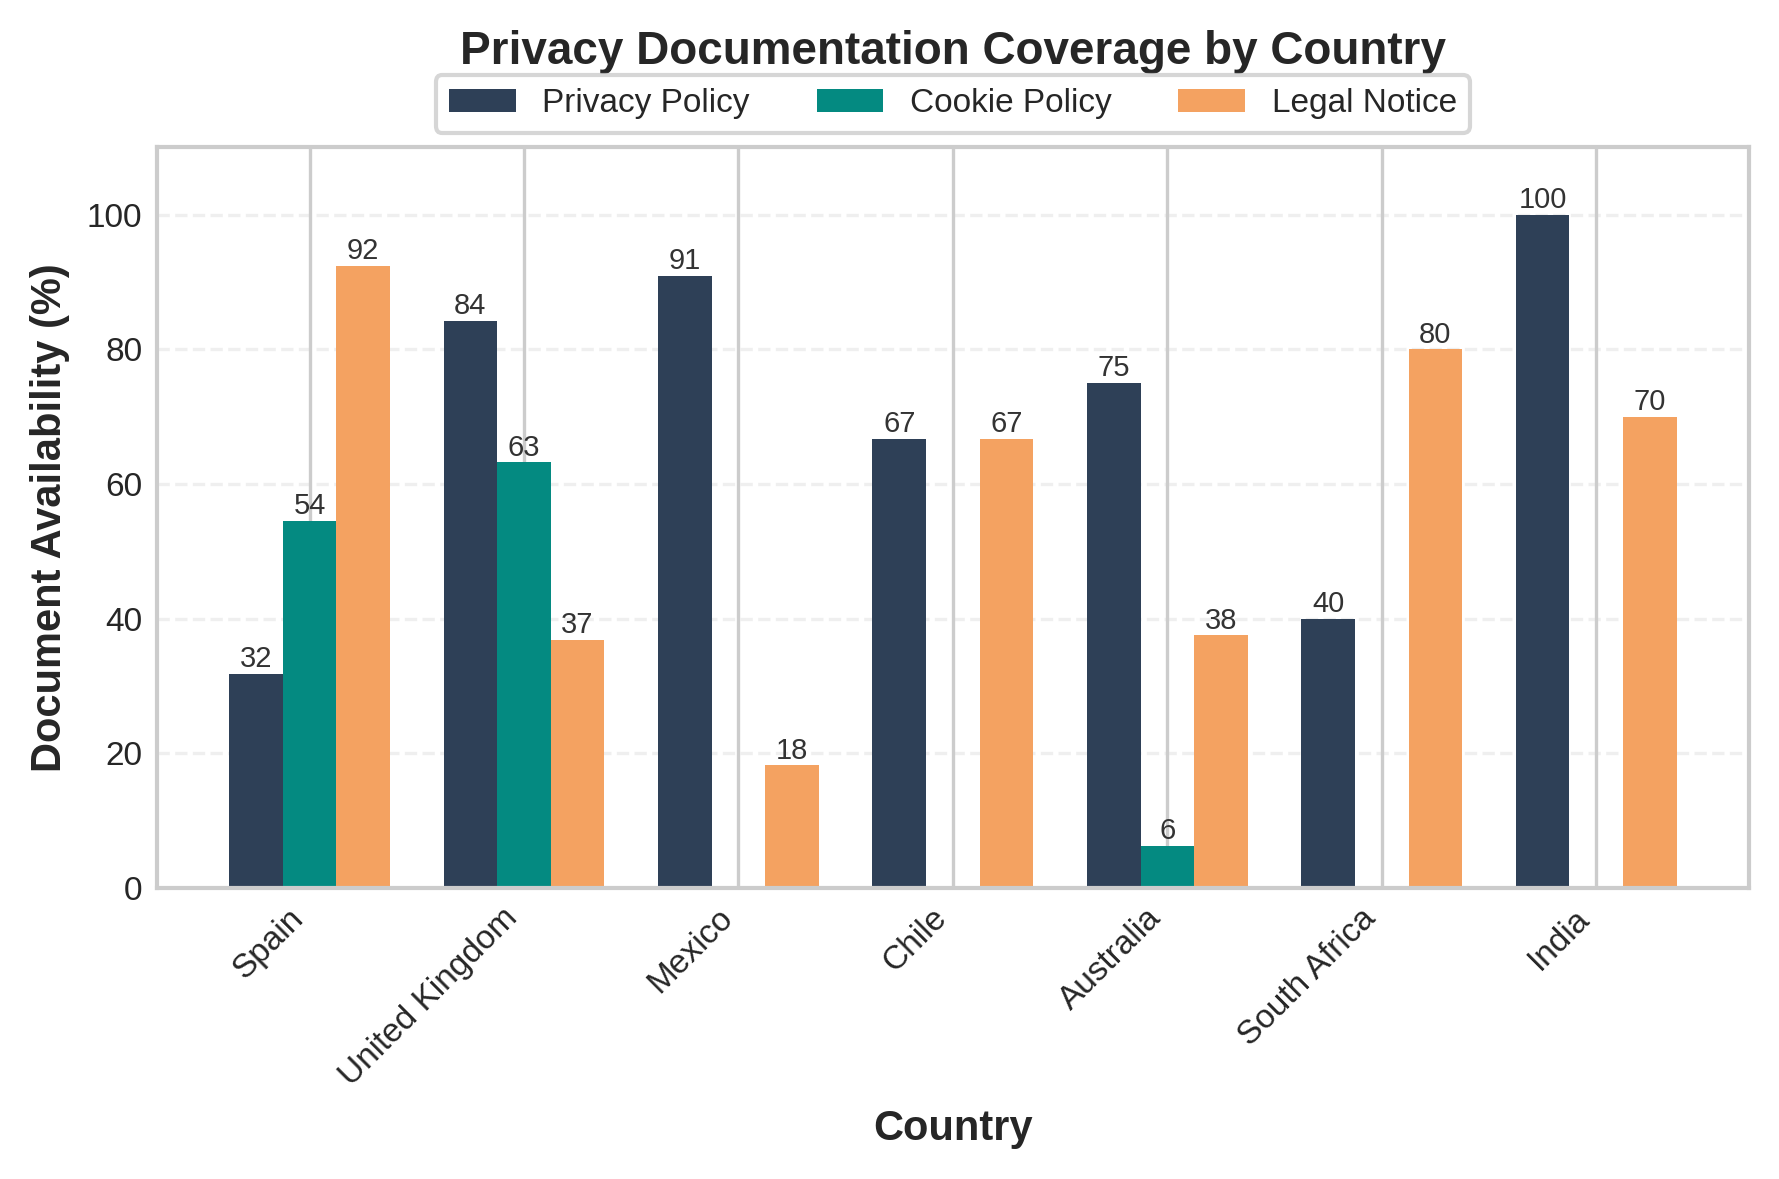

In [40]:
# GRÁFICA 1 MEJORADA: Documentación de Políticas
fig, ax = plt.subplots(figsize=(6, 4))

countries = ['Spain', 'United Kingdom', 'Mexico', 'Chile', 'Australia', 'South Africa', 'India']
privacy = [31.8, 84.2, 90.9, 66.7, 75.0, 40.0, 100.0]
cookie = [54.5, 63.2, 0, 0, 6.3, 0, 0]
legal = [92.4, 36.8, 18.2, 66.7, 37.5, 80.0, 70.0]

x = np.arange(len(countries))
width = 0.25

bars1 = ax.bar(x - width, privacy, width, label='Privacy Policy', color='#2E4057')
bars2 = ax.bar(x, cookie, width, label='Cookie Policy', color='#048A81')
bars3 = ax.bar(x + width, legal, width, label='Legal Notice', color='#F4A261')

# Añadir TODOS los porcentajes con tamaño más pequeño
for bars, values in [(bars1, privacy), (bars2, cookie), (bars3, legal)]:
    for bar, val in zip(bars, values):
        if val > 0:  # Solo mostrar si hay valor
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                   f'{val:.0f}', ha='center', fontsize=7, color='#333333')

ax.set_ylabel('Document Availability (%)', fontweight='bold')
ax.set_xlabel('Country', fontweight='bold')
ax.set_title('Privacy Documentation Coverage by Country', fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45, ha='right')

# Leyenda en el centro superior donde hay espacio
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          frameon=True, fancybox=True, ncol=3)

ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, 110)  # Un poco más de espacio para los números

plt.tight_layout()
plt.savefig('policy_documentation.pdf', dpi=300, bbox_inches='tight')
plt.show()

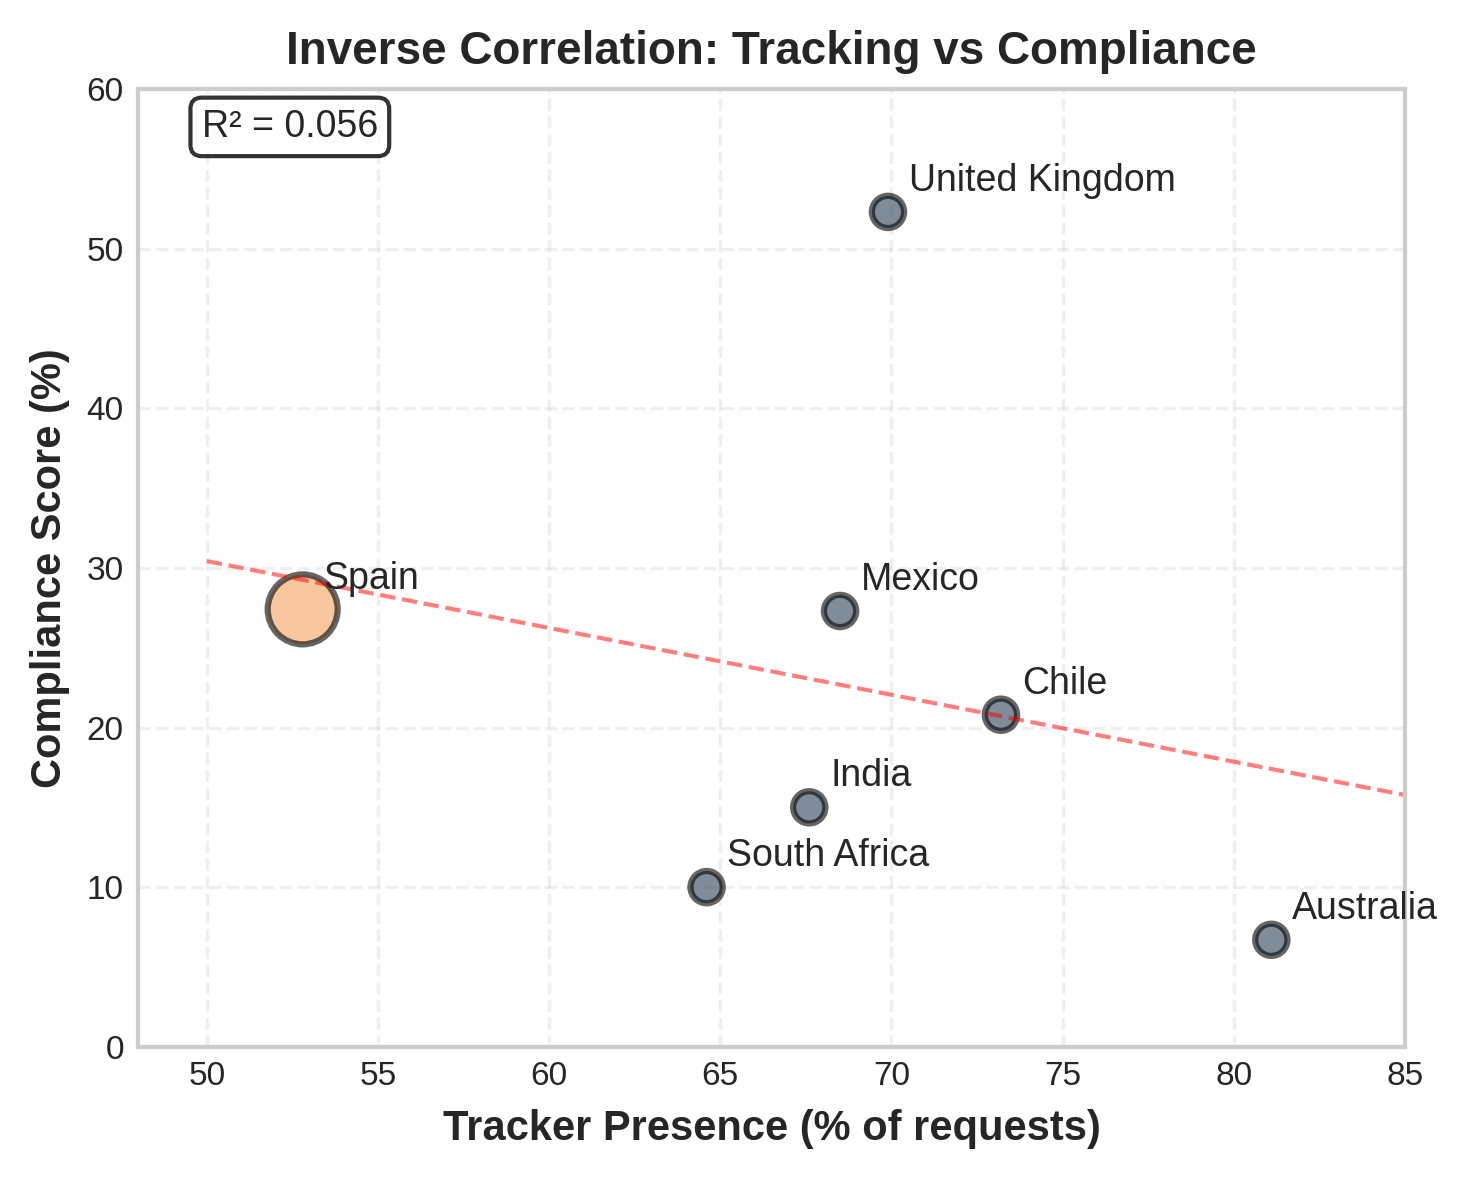

In [31]:
# GRÁFICA 2: Tracking vs Compliance
fig, ax = plt.subplots(figsize=(5, 4))

tracker_ratios = [52.8, 69.9, 68.5, 73.2, 81.1, 64.6, 67.6]
compliance_scores = [27.4, 52.3, 27.3, 20.8, 6.7, 10.0, 15.0]
sample_sizes = [94, 20, 20, 20, 20, 20, 20]

# Normalizar tamaños para visualización
sizes = [s * 3 for s in sample_sizes]

scatter = ax.scatter(tracker_ratios, compliance_scores, s=sizes,
                    c=['#F4A261'] + ['#2E4057']*6,
                    alpha=0.6, edgecolors='black', linewidth=1.5)

# Etiquetas
for i, country in enumerate(['Spain', 'United Kingdom', 'Mexico', 'Chile', 'Australia', 'South Africa', 'India']):
    ax.annotate(country, (tracker_ratios[i], compliance_scores[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

# Línea de tendencia
z = np.polyfit(tracker_ratios, compliance_scores, 1)
p = np.poly1d(z)
x_trend = np.linspace(50, 85, 100)
ax.plot(x_trend, p(x_trend), 'r--', alpha=0.5, linewidth=1)

ax.set_xlabel('Tracker Presence (% of requests)', fontweight='bold')
ax.set_ylabel('Compliance Score (%)', fontweight='bold')
ax.set_title('Inverse Correlation: Tracking vs Compliance', fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_xlim(48, 85)
ax.set_ylim(0, 60)

# Añadir R²
r_squared = np.corrcoef(tracker_ratios, compliance_scores)[0,1]**2
ax.text(0.05, 0.95, f'R² = {r_squared:.3f}', transform=ax.transAxes,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('tracking_compliance.pdf', dpi=300, bbox_inches='tight')
plt.show()

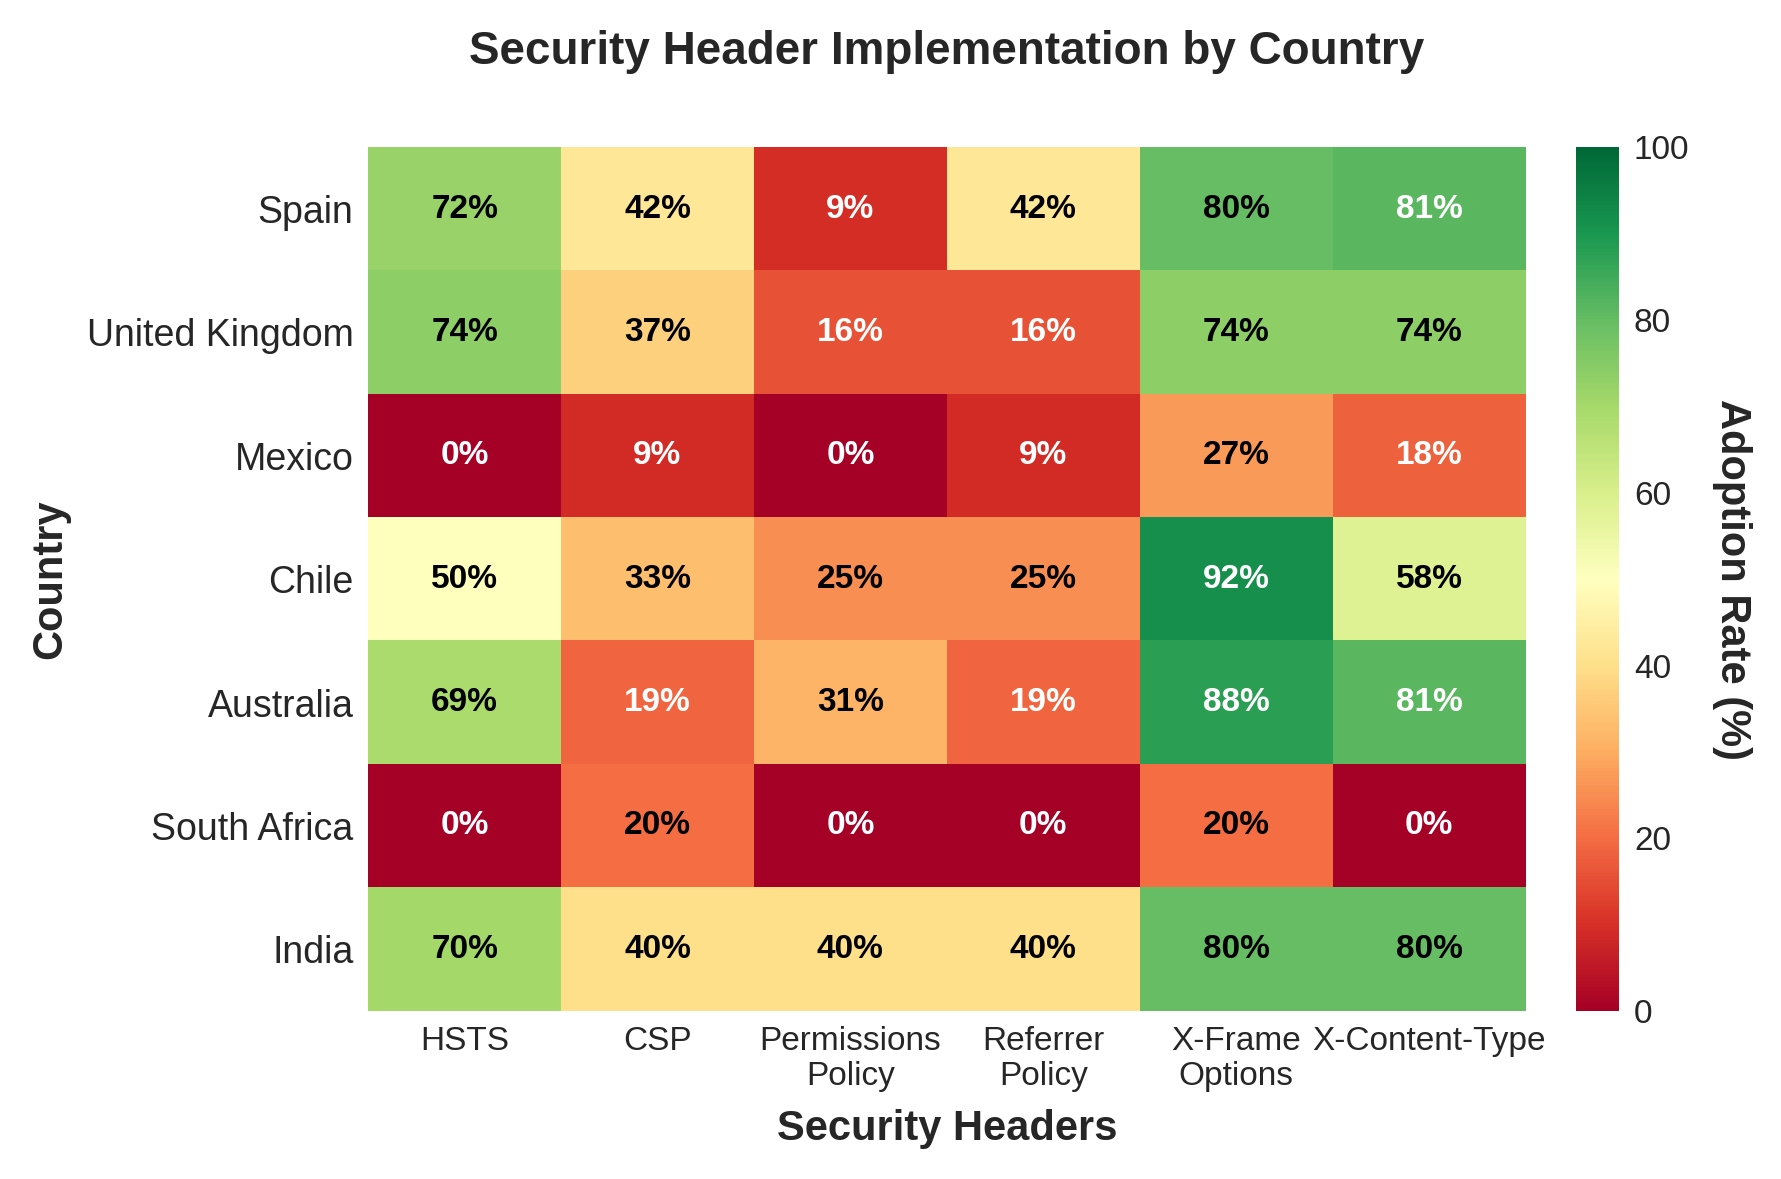

In [34]:
# GRÁFICA 3: Security Headers Heatmap - ESTILO UNIFICADO
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 4))

headers_data = {
    'Spain': [71.9, 42.2, 9.4, 42.2, 79.7, 81.3],
    'United Kingdom': [73.7, 36.8, 15.8, 15.8, 73.7, 73.7],
    'Mexico': [0, 9.1, 0, 9.1, 27.3, 18.2],
    'Chile': [50, 33.3, 25, 25, 91.7, 58.3],
    'Australia': [68.8, 18.8, 31.3, 18.8, 87.5, 81.3],
    'South Africa': [0, 20, 0, 0, 20, 0],
    'India': [70, 40, 40, 40, 80, 80]
}

headers = ['HSTS', 'CSP', 'Permissions\nPolicy', 'Referrer\nPolicy',
           'X-Frame\nOptions', 'X-Content-Type']

# Crear el heatmap
data_array = np.array(list(headers_data.values()))

# Usar colormaps sin líneas
im = ax.imshow(data_array, cmap='RdYlGn', aspect='auto', vmin=0, vmax=100)

# Configurar ticks SIN líneas de cuadrícula
ax.set_xticks(np.arange(len(headers)))
ax.set_yticks(np.arange(len(list(headers_data.keys()))))
ax.set_xticklabels(headers, fontsize=8)
ax.set_yticklabels(list(headers_data.keys()), fontsize=9)

# ELIMINAR COMPLETAMENTE las líneas
ax.grid(False)
ax.set_xticks([], minor=True)
ax.set_yticks([], minor=True)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(which='both', length=0)

# Añadir valores en cada celda
for i in range(len(headers_data)):
    for j in range(len(headers)):
        val = data_array[i, j]
        # Color del texto según el valor
        text_color = 'white' if val < 20 or val > 80 else 'black'
        text = ax.text(j, i, f'{val:.0f}%',
                      ha="center", va="center", color=text_color,
                      fontsize=8, fontweight='bold')

ax.set_title('Security Header Implementation by Country', fontweight='bold', pad=20)
ax.set_ylabel('Country', fontweight='bold')
ax.set_xlabel('Security Headers', fontweight='bold')

# Colorbar sin líneas
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Adoption Rate (%)', rotation=270, labelpad=15, fontweight='bold')
cbar.ax.tick_params(labelsize=8)
cbar.outline.set_visible(False)

plt.tight_layout()
plt.savefig('security_headers.pdf', dpi=300, bbox_inches='tight')
plt.show()

KeyError: 'danger'

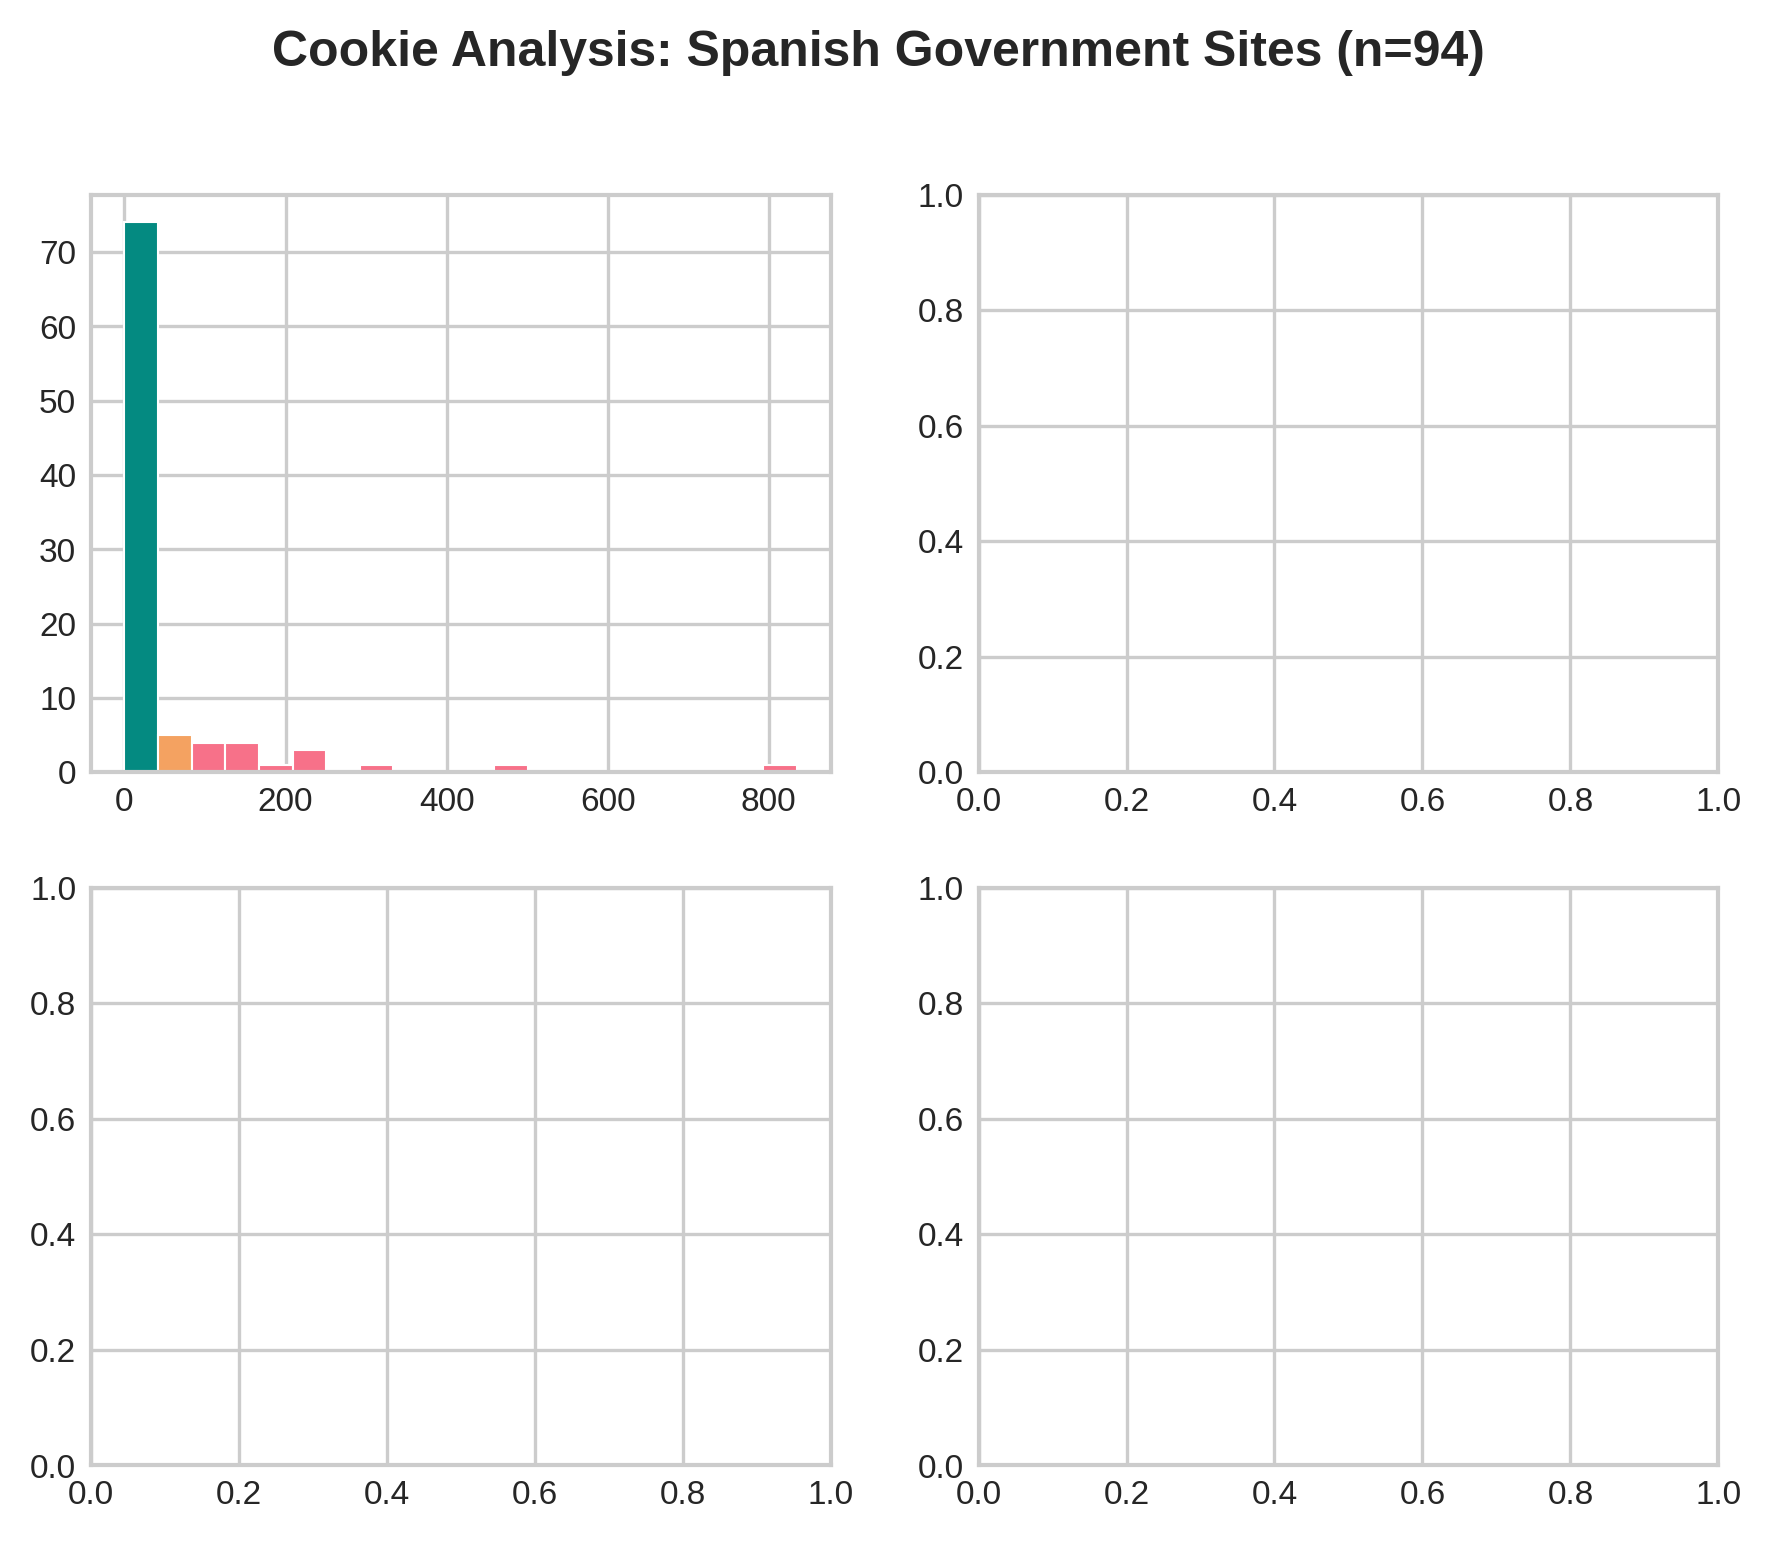

In [33]:
# GRÁFICA 4: Cookie Analysis Spain - REDISEÑADA
fig, axes = plt.subplots(2, 2, figsize=(7, 5.5))
fig.suptitle('Cookie Analysis: Spanish Government Sites (n=94)',
             fontweight='bold', fontsize=12)

spain_df = pd.read_csv('master_dataset_spain.csv')
cookies = spain_df['cookies_total'].dropna()

# Panel 1: Histograma principal
ax1 = axes[0, 0]
n, bins, patches = ax1.hist(cookies, bins=20, edgecolor='white', linewidth=0.5)

# Colorear barras según valor
for i, patch in enumerate(patches):
    if bins[i] < 20:
        patch.set_facecolor(COLORS['secondary'])
    elif bins[i] < 60:
        patch.set_facecolor(COLORS['accent'])
    else:
        patch.set_facecolor(COLORS['danger'])

ax1.axvline(cookies.median(), color=COLORS['dark'], linestyle='--',
            linewidth=1.5, label=f'Median: {cookies.median():.0f}')
ax1.axvline(cookies.mean(), color=COLORS['primary'], linestyle=':',
            linewidth=1.5, label=f'Mean: {cookies.mean():.0f}')

ax1.set_xlabel('Number of Cookies')
ax1.set_ylabel('Number of Sites')
ax1.set_title('Distribution', fontweight='bold', fontsize=10)
ax1.legend(loc='upper right', frameon=False)
ax1.grid(axis='y', alpha=0.2, linestyle='-', linewidth=0.5)

# Panel 2: Box plot
ax2 = axes[0, 1]
bp = ax2.boxplot(cookies, vert=True, patch_artist=True, widths=0.5,
                 showfliers=True, flierprops=dict(marker='o', markersize=3))
bp['boxes'][0].set_facecolor(COLORS['primary'])
bp['boxes'][0].set_alpha(0.7)
bp['medians'][0].set_color(COLORS['danger'])
bp['medians'][0].set_linewidth(2)

ax2.set_ylabel('Number of Cookies')
ax2.set_title('Statistical Summary', fontweight='bold', fontsize=10)
ax2.grid(axis='y', alpha=0.2, linestyle='-', linewidth=0.5)
ax2.set_xticklabels(['All Sites'])

# Panel 3: Categorías
ax3 = axes[1, 0]
categories = ['Low\n(≤10)', 'Medium\n(11-50)', 'High\n(51-100)', 'Extreme\n(>100)']
cat_counts = [
    sum(cookies <= 10),
    sum((cookies > 10) & (cookies <= 50)),
    sum((cookies > 50) & (cookies <= 100)),
    sum(cookies > 100)
]
colors_cat = [COLORS['secondary'], COLORS['accent'], COLORS['danger'], '#8B0000']

bars = ax3.bar(categories, cat_counts, color=colors_cat, alpha=0.85,
               edgecolor=COLORS['dark'], linewidth=0.5)
ax3.set_ylabel('Number of Sites')
ax3.set_title('Sites by Cookie Volume', fontweight='bold', fontsize=10)
ax3.grid(axis='y', alpha=0.2, linestyle='-', linewidth=0.5)

# Añadir valores sin superposición
for bar, count in zip(bars, cat_counts):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, height + 1,
            f'{count}\n({count/len(cookies)*100:.0f}%)',
            ha='center', fontsize=7.5, color=COLORS['dark'])

# Panel 4: Métricas clave
ax4 = axes[1, 1]
ax4.axis('off')

# Estilo de tabla
for key, cell in table.get_celld().items():
    if key[0] == 0:  # Headers
        cell.set_facecolor(COLORS['primary'])
        cell.set_text_props(weight='bold', color='white')
    else:
        cell.set_facecolor(COLORS['light'])
    cell.set_edgecolor(COLORS['dark'])
    cell.set_linewidth(0.5)

plt.tight_layout()
plt.savefig('spain_cookies.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# GRÁFICA 5: Servicios Third-Party
fig, ax = plt.subplots(figsize=(6, 4))

services = ['Google Tag\nManager', 'Google\nAnalytics', 'DoubleClick',
            'Google APIs', 'YouTube', 'Twitter', 'unpkg.com', 'Facebook']
counts = [42, 38, 35, 24, 15, 6, 5, 3]
percentages = [c/94*100 for c in counts]

# Colores por categoría
colors = ['#D6292F', '#D6292F', '#D6292F',  # Google - rojo
          '#2E4057', '#048A81',  # APIs/Content - azul
          '#048A81', '#048A81', '#048A81']  # Social/CDN - verde

bars = ax.bar(range(len(services)), percentages, color=colors, alpha=0.8)

ax.set_xticks(range(len(services)))
ax.set_xticklabels(services, rotation=45, ha='right', fontsize=9)
ax.set_ylabel('Prevalence (%)', fontweight='bold')
ax.set_title('Third-Party Service Integration in Spanish Government Sites',
             fontweight='bold')
ax.set_ylim(0, 50)
ax.grid(axis='y', alpha=0.3)

# Añadir valores
for bar, pct in zip(bars, percentages):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f'{pct:.1f}%', ha='center', fontsize=8)

# Leyenda
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#D6292F', alpha=0.8, label='Tracking/Analytics'),
    Patch(facecolor='#2E4057', alpha=0.8, label='Content Delivery'),
    Patch(facecolor='#048A81', alpha=0.8, label='Social/External')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=8)

plt.tight_layout()
plt.savefig('third_party_services.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# GRÁFICA EXTRA: Tipos de Violaciones
fig, ax = plt.subplots(figsize=(6, 4))

violations_data = {
    'Transfer\nViolations': [77.8, 100, 100, 100, 100, 100, 100],
    'No-tracking\nClaim Failures': [56.1, 63.2, 100, 100, 93.8, 100, 100],
    'Missing\nConsent': [47.0, 36.8, 100, 100, 93.8, 100, 100]
}

x = np.arange(len(countries))
width = 0.25
colors_viol = ['#8B0000', '#D6292F', '#F4A261']

for i, (violation, values) in enumerate(violations_data.items()):
    offset = (i - 1) * width
    ax.bar(x + offset, values, width, label=violation, color=colors_viol[i], alpha=0.8)

ax.set_ylabel('Sites with Violation (%)', fontweight='bold')
ax.set_xlabel('Country', fontweight='bold')
ax.set_title('Systematic Compliance Failures Across Countries', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45, ha='right')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, frameon=False, fontsize=8)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 110)

plt.tight_layout()
plt.savefig('violations_breakdown.pdf', dpi=300, bbox_inches='tight')